In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm import tqdm
import missingno as msno
import seaborn as sns
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import UnivariateSpline
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import warnings
warnings.simplefilter('ignore') # 
#from pandarallel import pandarallel

In [2]:
annual_performance = pd.read_pickle('annual_performance.pickle')
annual_performance = annual_performance.rename(columns= {'Log Real Annual NCF Per Unit': 'Log Real Year NCF Per Unit'})

In [3]:
first_year_performance = annual_performance.groupby('Loan Number').head(1)

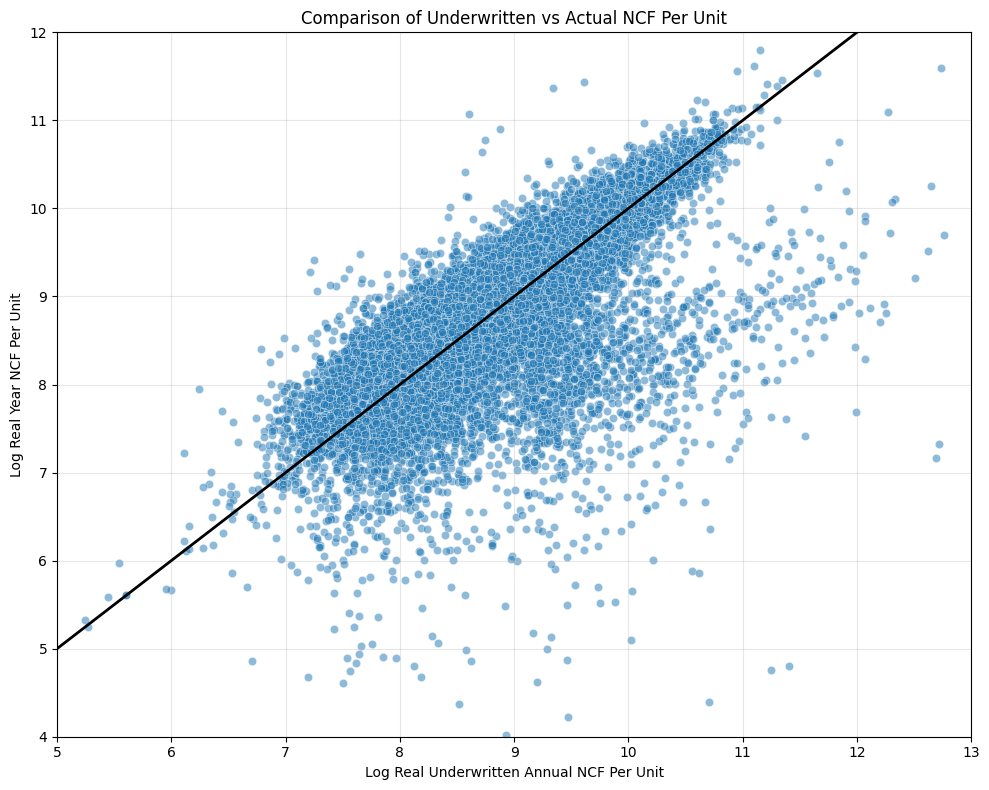

In [4]:
# Create the scatter plot
plt.figure(figsize=(10, 8))

# Plot scatter points
sns.scatterplot(data=first_year_performance, 
                x='Log Real Underwritten Annual NCF Per Unit', 
                y='Log Real Year NCF Per Unit',
                alpha=0.5)

# Add fitted line
sns.regplot(data=first_year_performance, 
            x='Log Real Underwritten Annual NCF Per Unit', 
            y='Log Real Year NCF Per Unit',
            scatter=False,
            color='red')

# Add 45-degree line
x = np.linspace(5, 13, 100)
plt.plot(x, x, 'k-', linewidth=2)

# Set axis limits
plt.xlim(5, 13)
plt.ylim(4, 12)

# Add labels and title
plt.xlabel('Log Real Underwritten Annual NCF Per Unit')
plt.ylabel('Log Real Year NCF Per Unit')
plt.title('Comparison of Underwritten vs Actual NCF Per Unit')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## NCF_T Growth_uw_ncf_t0 Construction

## NCF_T Growth Construction

In [5]:
# Load the dictionary from the pickle file
with open('growth_dataframes.pkl', 'rb') as f:
    growth_dataframes = pickle.load(f)

# Assign individual dataframes from the dictionary
df_1yr_growth = growth_dataframes[1]
df_2yr_growth = growth_dataframes[2]
df_3yr_growth = growth_dataframes[3]
df_4yr_growth = growth_dataframes[4]
df_5yr_growth = growth_dataframes[5]


In [6]:
df_5yr_growth

,Loan Number,Property State,log_Num_Unit,Physical Occupancy %,Loan Acquisition LTV,Underwritten Cap Rate,Real Underwritten Annual NCF Per Unit,Log Real Underwritten Annual NCF Per Unit,Year+0,ln_median_income+0,Building Age+0,Building Age_sq+0,Log Real Year NCF Per Unit+0,Year+1,ln_median_income+1,Building Age+1,Building Age_sq+1,Log Real Year NCF Per Unit+1,Year+2,ln_median_income+2,Building Age+2,Building Age_sq+2,Log Real Year NCF Per Unit+2,Year+3,ln_median_income+3,Building Age+3,Building Age_sq+3,Log Real Year NCF Per Unit+3,Year+4,ln_median_income+4,Building Age+4,Building Age_sq+4,Log Real Year NCF Per Unit+4,Year+5,ln_median_income+5,Building Age+5,Building Age_sq+5,Log Real Year NCF Per Unit+5,Actual_5yr_Growth,ln_median_income_5yr_growth
0,1674053544,MN,3.9512,96.0000,0.8300,0.0951,7714.3684,8.9508,2007,11.2244,20.0000,400.0000,8.8322,2008,11.2244,21.0000,441.0000,8.8386,2009,11.2244,22.0000,484.0000,8.8896,2010,11.2244,23.0000,529.0000,8.9165,2011,11.2244,24.0000,576.0000,8.9261,2012,11.3577,25.0000,625.0000,8.9296,0.0974,0.1333
1,1674053544,MN,3.9512,96.0000,0.8300,0.0951,7714.3684,8.9508,2008,11.2244,20.0000,400.0000,8.8386,2009,11.2244,21.0000,441.0000,8.8896,2010,11.2244,22.0000,484.0000,8.9165,2011,11.2244,23.0000,529.0000,8.9261,2012,11.3577,24.0000,576.0000,8.9296,2013,11.3648,25.0000,625.0000,8.9055,0.0670,0.1403
2,1674053544,MN,3.9512,96.0000,0.8300,0.0951,7714.3684,8.9508,2009,11.2244,20.0000,400.0000,8.8896,2010,11.2244,21.0000,441.0000,8.9165,2011,11.2244,22.0000,484.0000,8.9261,2012,11.3577,23.0000,529.0000,8.9296,2013,11.3648,24.0000,576.0000,8.9055,2014,11.2491,25.0000,625.0000,8.8511,-0.0385,0.0247
3,1674053544,MN,3.9512,96.0000,0.8300,0.0951,7714.3684,8.9508,2010,11.2244,20.0000,400.0000,8.9165,2011,11.2244,21.0000,441.0000,8.9261,2012,11.3577,22.0000,484.0000,8.9296,2013,11.3648,23.0000,529.0000,8.9055,2014,11.2491,24.0000,576.0000,8.8511,2015,11.2344,25.0000,625.0000,8.9078,-0.0087,0.0100
4,1674053544,MN,3.9512,96.0000,0.8300,0.0951,7714.3684,8.9508,2011,11.2244,20.0000,400.0000,8.9261,2012,11.3577,21.0000,441.0000,8.9296,2013,11.3648,22.0000,484.0000,8.9055,2014,11.2491,23.0000,529.0000,8.8511,2015,11.2344,24.0000,576.0000,8.9078,2016,11.2152,25.0000,625.0000,8.8840,-0.0421,-0.0092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58600,8300008088,MI,4.9836,87.4000,0.8330,0.0739,2376.8588,7.7735,2012,10.6373,41.0000,1681.0000,8.1914,2013,10.6438,42.0000,1764.0000,7.9665,2014,10.6393,43.0000,1849.0000,7.9492,2015,10.6102,44.0000,1936.0000,7.7286,2016,10.6430,45.0000,2025.0000,7.5552,2017,10.7018,46.0000,2116.0000,8.0522,-0.1391,0.0645
58601,8300008088,MI,4.9836,87.4000,0.8330,0.0739,2376.8588,7.7735,2013,10.6438,41.0000,1681.0000,7.9665,2014,10.6393,42.0000,1764.0000,7.9492,2015,10.6102,43.0000,1849.0000,7.7286,2016,10.6430,44.0000,1936.0000,7.5552,2017,10.7018,45.0000,2025.0000,8.0522,2018,10.7657,46.0000,2116.0000,8.0177,0.0512,0.1219
58602,8300008158,TN,5.5607,95.0000,0.6550,0.0517,2601.2246,7.8637,2018,10.7324,64.0000,4096.0000,7.4325,2019,10.7889,65.0000,4225.0000,8.0914,2020,10.8195,66.0000,4356.0000,7.8594,2021,10.8780,67.0000,4489.0000,7.8359,2022,10.9244,68.0000,4624.0000,7.8088,2023,10.9244,69.0000,4761.0000,7.6288,0.1963,0.1921
58603,8300008159,TN,5.5910,95.0000,0.7000,0.0526,2381.6489,7.7755,2018,10.8752,44.0000,1936.0000,7.0205,2019,10.9520,45.0000,2025.0000,7.7901,2020,10.9577,46.0000,2116.0000,7.5701,2021,10.9988,47.0000,2209.0000,7.6132,2022,11.0932,48.0000,2304.0000,7.7631,2023,11.0932,49.0000,2401.0000,7.7068,0.6863,0.2180


In [7]:
# Filter df_5yr_growth to keep only rows where the difference between 'Year+5' and 'Year+0' is 5
df_5yr_growth = df_5yr_growth[(df_5yr_growth['Year+5'] - df_5yr_growth['Year+0']) == 5]

# Filter df_4yr_growth to keep only rows where the difference between 'Year+4' and 'Year+0' is 4
df_4yr_growth = df_4yr_growth[(df_4yr_growth['Year+4'] - df_4yr_growth['Year+0']) == 4]

# Filter df_3yr_growth to keep only rows where the difference between 'Year+3' and 'Year+0' is 3
df_3yr_growth = df_3yr_growth[(df_3yr_growth['Year+3'] - df_3yr_growth['Year+0']) == 3]

# Filter df_2yr_growth to keep only rows where the difference between 'Year+2' and 'Year+0' is 2
df_2yr_growth = df_2yr_growth[(df_2yr_growth['Year+2'] - df_2yr_growth['Year+0']) == 2]

# Filter df_1yr_growth to keep only rows where the difference between 'Year+1' and 'Year+0' is 1
df_1yr_growth = df_1yr_growth[(df_1yr_growth['Year+1'] - df_1yr_growth['Year+0']) == 1]


In [8]:
# Compute descriptive statistics for each growth column with specified percentiles
desc_1yr = df_1yr_growth['Actual_1yr_Growth'].describe(percentiles=[0.01,0.05, 0.25, 0.75, 0.95,0.99])
desc_2yr = df_2yr_growth['Actual_2yr_Growth'].describe(percentiles=[0.01,0.05, 0.25, 0.75, 0.95,0.99])
desc_3yr = df_3yr_growth['Actual_3yr_Growth'].describe(percentiles=[0.01,0.05, 0.25, 0.75, 0.95,0.99])
desc_4yr = df_4yr_growth['Actual_4yr_Growth'].describe(percentiles=[0.01,0.05, 0.25, 0.75, 0.95,0.99])
desc_5yr = df_5yr_growth['Actual_5yr_Growth'].describe(percentiles=[0.01,0.05, 0.25, 0.75, 0.95,0.99])

# Combine these into one dataframe for easy comparison
descriptive_stats = pd.DataFrame({
    '1-Year Growth': desc_1yr,
    '2-Year Growth': desc_2yr,
    '3-Year Growth': desc_3yr,
    '4-Year Growth': desc_4yr,
    '5-Year Growth': desc_5yr
})

descriptive_stats

,1-Year Growth,2-Year Growth,3-Year Growth,4-Year Growth,5-Year Growth
count,206054.0000,158122.0000,116958.0000,83628.0000,56935.0000
mean,0.0009,0.0027,0.0085,0.0162,0.0202
std,0.2473,0.2970,0.3220,0.3442,0.3676
min,-6.8875,-6.4501,-4.9830,-5.0851,-5.0451
1%,-0.7340,-0.9114,-0.9670,-1.0139,-1.0875
5%,-0.3052,-0.3903,-0.4315,-0.4596,-0.4973
25%,-0.0689,-0.0944,-0.1084,-0.1167,-0.1269
50%,0.0100,0.0157,0.0219,0.0295,0.0339
75%,0.0817,0.1156,0.1426,0.1686,0.1896
95%,0.2750,0.3487,0.3969,0.4419,0.4817


In [9]:
# Set upper and lower bounds
ub = 1
lb = -0.5

# Function to filter a dataframe based on growth bounds
def filter_growth(df, column_name, lb, ub):
    if df is not None:  # Ensure the dataframe exists
        return df[(df[column_name] >= lb) & (df[column_name] <= ub)]
    return None

# Apply filtering for each growth dataframe
df_1yr_growth = filter_growth(df_1yr_growth, 'Actual_1yr_Growth', lb, ub)
df_2yr_growth = filter_growth(df_2yr_growth, 'Actual_2yr_Growth', lb, ub)
df_3yr_growth = filter_growth(df_3yr_growth, 'Actual_3yr_Growth', lb, ub)
df_4yr_growth = filter_growth(df_4yr_growth, 'Actual_4yr_Growth', lb, ub)
df_5yr_growth = filter_growth(df_5yr_growth, 'Actual_5yr_Growth', lb, ub)

In [10]:
for i in range(1, 6):
    locals()[f'df_{i}yr_growth'].dropna(inplace=True)

In [11]:
# Compute descriptive statistics for each growth column with specified percentiles
desc_1yr = df_1yr_growth['Actual_1yr_Growth'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])
desc_2yr = df_2yr_growth['Actual_2yr_Growth'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])
desc_3yr = df_3yr_growth['Actual_3yr_Growth'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])
desc_4yr = df_4yr_growth['Actual_4yr_Growth'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])
desc_5yr = df_5yr_growth['Actual_5yr_Growth'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])

# Combine these into one dataframe for easy comparison
descriptive_stats = pd.DataFrame({
    '1-Year Growth': desc_1yr,
    '2-Year Growth': desc_2yr,
    '3-Year Growth': desc_3yr,
    '4-Year Growth': desc_4yr,
    '5-Year Growth': desc_5yr
})

descriptive_stats

,1-Year Growth,2-Year Growth,3-Year Growth,4-Year Growth,5-Year Growth
count,200842.0000,152136.0000,111713.0000,79377.0000,53634.0000
mean,0.0138,0.0233,0.0340,0.0452,0.0542
std,0.1600,0.1908,0.2088,0.2239,0.2378
min,-0.4999,-0.4999,-0.4999,-0.5000,-0.5000
5%,-0.2441,-0.2905,-0.3068,-0.3202,-0.3332
25%,-0.0625,-0.0810,-0.0899,-0.0951,-0.0989
50%,0.0121,0.0206,0.0290,0.0388,0.0452
75%,0.0826,0.1175,0.1459,0.1721,0.1947
95%,0.2660,0.3341,0.3824,0.4242,0.4629
max,0.9999,0.9996,0.9999,0.9996,0.9997


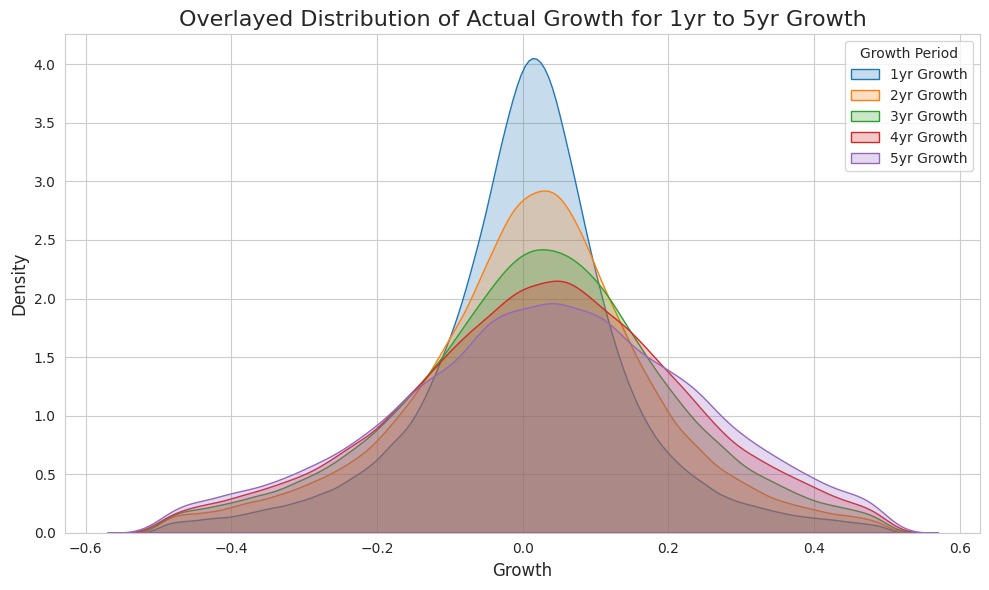

In [12]:
# Set the upper and lower bounds
ub = 0.5
lb = -0.5

# Filter each dataframe between -0.5 and 0.5 for their respective growth columns
filtered_1yr = df_1yr_growth[(df_1yr_growth['Actual_1yr_Growth'] >= lb) & (df_1yr_growth['Actual_1yr_Growth'] <= ub)]
filtered_2yr = df_2yr_growth[(df_2yr_growth['Actual_2yr_Growth'] >= lb) & (df_2yr_growth['Actual_2yr_Growth'] <= ub)]
filtered_3yr = df_3yr_growth[(df_3yr_growth['Actual_3yr_Growth'] >= lb) & (df_3yr_growth['Actual_3yr_Growth'] <= ub)]
filtered_4yr = df_4yr_growth[(df_4yr_growth['Actual_4yr_Growth'] >= lb) & (df_4yr_growth['Actual_4yr_Growth'] <= ub)]
filtered_5yr = df_5yr_growth[(df_5yr_growth['Actual_5yr_Growth'] >= lb) & (df_5yr_growth['Actual_5yr_Growth'] <= ub)]

# Set up the plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the filtered distribution for 1-year growth
sns.kdeplot(filtered_1yr['Actual_1yr_Growth'], label='1yr Growth', shade=True)

# Plot the filtered distribution for 2-year growth
sns.kdeplot(filtered_2yr['Actual_2yr_Growth'], label='2yr Growth', shade=True)

# Plot the filtered distribution for 3-year growth
sns.kdeplot(filtered_3yr['Actual_3yr_Growth'], label='3yr Growth', shade=True)

# Plot the filtered distribution for 4-year growth
sns.kdeplot(filtered_4yr['Actual_4yr_Growth'], label='4yr Growth', shade=True)

# Plot the filtered distribution for 5-year growth
sns.kdeplot(filtered_5yr['Actual_5yr_Growth'], label='5yr Growth', shade=True)

# Add titles and labels
plt.title('Overlayed Distribution of Actual Growth for 1yr to 5yr Growth', fontsize=16)
plt.xlabel('Growth', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Growth Period')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## NCF_T Growth Model

In [13]:
# Dictionary mapping each year range to its corresponding dataframe
growth_dataframes = {
    1: df_1yr_growth,
    2: df_2yr_growth,
    3: df_3yr_growth,
    4: df_4yr_growth,
    5: df_5yr_growth
}

# Loop through each year range (1 to 5 years)
models = {}  # Dictionary to store each model

for year_range in range(1, 6):
    # Get the correct dataframe for the current year range
    reshaped_df = growth_dataframes[year_range]
    
    # Define the dynamic column names based on the year range
    actual_growth_col = f'Actual_{year_range}yr_Growth'
    ln_median_income_col = f'ln_median_income_{year_range}yr_growth'
    log_real_ncf_col = 'Log Real Underwritten Annual NCF Per Unit'  # Constant column for all years
    
    # Prepare the independent variables
    prepared_X = reshaped_df[['Loan Number', actual_growth_col, 'Property State', 'Year+0', ln_median_income_col,
                              'Building Age+0', 'Building Age_sq+0', 'Physical Occupancy %', 'Loan Acquisition LTV', 'log_Num_Unit', log_real_ncf_col]]
    
    # Prepare Year_t
    prepared_X['Year_t'] = prepared_X['Year+0']
    prepared_X.drop(columns=['Year+0'], inplace=True)
    
    # Filter for valid growth range
    #prepared_X = prepared_X[(prepared_X[actual_growth_col] > -0.5) & (prepared_X[actual_growth_col] < 0.6)]
    
    # Create dummy variables for 'Year_t' and 'Property State'
    prepared_X = pd.get_dummies(prepared_X, columns=['Year_t'], drop_first=False)
    prepared_X = pd.get_dummies(prepared_X, columns=['Property State'], drop_first=False)
    
    # Drop 'Property State_NY' if it exists
    if 'Property State_NY' in prepared_X.columns:
        prepared_X.drop(columns=['Property State_NY'], inplace=True)
    if 'Year_t_2008' in prepared_X.columns:
        prepared_X.drop(columns=['Year_t_2007'], inplace=True)
    
    # Handle missing values
    #prepared_X.dropna(inplace=True)
    
    # Convert boolean columns to integer type
    prepared_X = prepared_X.astype({col: int for col in prepared_X.columns if prepared_X[col].dtype == bool})
    
    # Select the independent variables
    chosen_vars = [ln_median_income_col, 'Building Age+0', 'Building Age_sq+0', 'Physical Occupancy %',
                   'Loan Acquisition LTV', 'log_Num_Unit', log_real_ncf_col]  # Example of user-selected variables
    
    # Add all the dummy variables created for 'Year_t' and 'Property State'
    independent_vars = chosen_vars + [col for col in prepared_X.columns if col.startswith('Year_t_') or col.startswith('Property State_')]
    
    # Define the independent (X) and dependent (y) variables
    X = prepared_X[independent_vars]
    X = sm.add_constant(X)
    y = prepared_X[actual_growth_col]
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    #reshaped_df[f'pred_{year_range}yr_NOI_Growth'] = model.fittedvalues
    # Store the model in the dictionary with a descriptive name
    model_name = f'fannie_{year_range}yr_noiG_model'
    models[model_name] = model
    
    # Add the predicted values to the dataframe
    locals()[f'df_{year_range}yr_growth'][f'pred_{year_range}yr_NOI_Growth'] = model.fittedvalues
    #prepared_X[f'pred_{year_range}yr_NOI_Growth'] = model.fittedvalues
    # Merge the predictions back to the reshaped dataframe
    #locals()[f'df_{year_range}yr_growth'] = locals()[f'df_{year_range}yr_growth'].merge(prepared_X[['Loan Number', f'Pred_{year_range}yr_NOI_Growth']], on='Loan Number', how='left')
    #reshaped_df = reshaped_df.merge(prepared_X[['Loan Number', f'pred_{year_range}yr_NOI_Growth']], on='Loan Number', how='left')
    # Print the model summary for reference
    print(f"Summary for {year_range}-year growth model:")
    print(model.summary())

# The models dictionary now contains each year range model (1 to 5 years)

# NOTE: Inforce Table 3: Auxiliary Model For Annual NOI Growth (last table)

Summary for 1-year growth model:
                            OLS Regression Results                            
Dep. Variable:      Actual_1yr_Growth   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     46.94
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:09:30   Log-Likelihood:                 84829.
No. Observations:              200842   AIC:                        -1.695e+05
Df Residuals:                  200768   BIC:                        -1.688e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

<Figure size 1200x800 with 0 Axes>

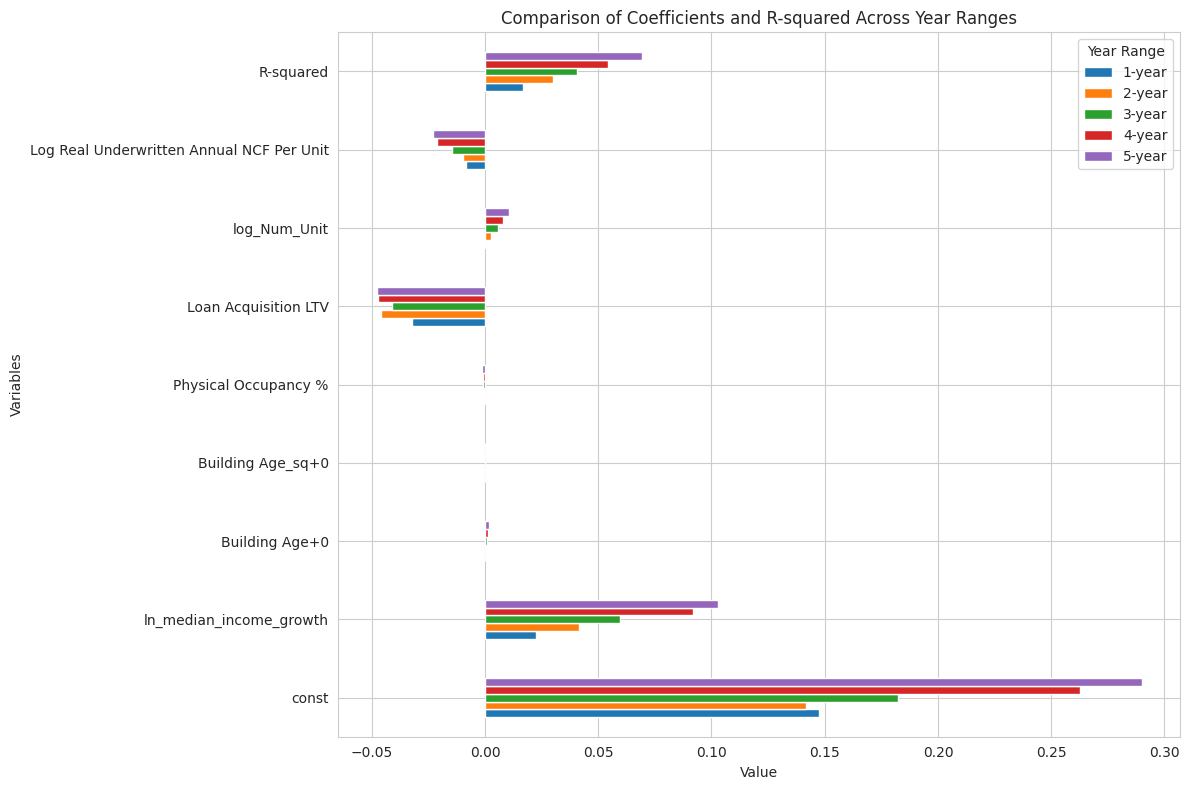

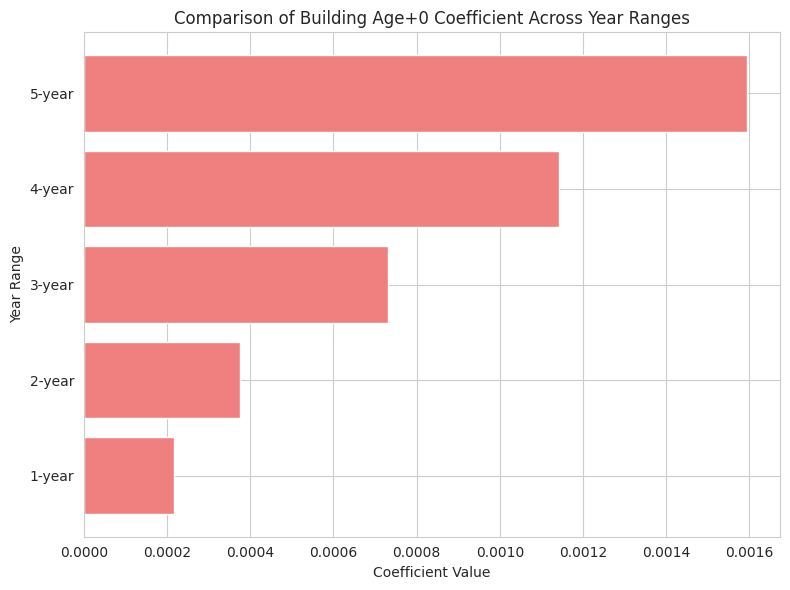

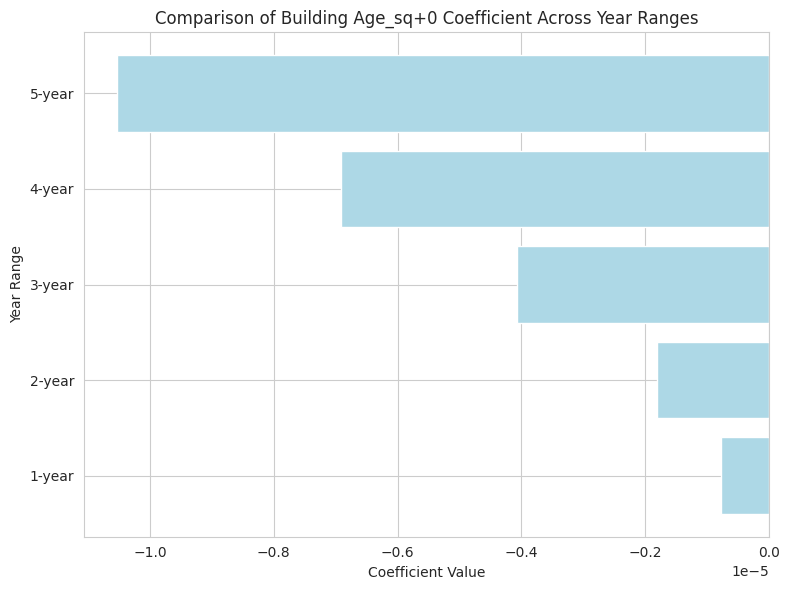

In [14]:
# Create an empty dataframe to store coefficients and R-squared values
model_results = pd.DataFrame(columns=['Year Range', 'const', 'ln_median_income_growth', 'Building Age+0', 'Building Age_sq+0', 'Physical Occupancy %',
                                      'Loan Acquisition LTV', 'log_Num_Unit', 'Log Real Underwritten Annual NCF Per Unit', 'R-squared'])

# Loop through the models and extract the coefficients and R-squared values
for year_range in range(1, 6):
    model = models[f'fannie_{year_range}yr_noiG_model']
    
    # Extract coefficients
    coeffs = model.params
    
    # Create a new row as a DataFrame
    row = pd.DataFrame({
        'Year Range': [f'{year_range}-year'],
        'const': [coeffs['const']],
        'ln_median_income_growth': [coeffs.get(f'ln_median_income_{year_range}yr_growth', None)],
        'Building Age+0': [coeffs.get('Building Age+0', None)],
        'Building Age_sq+0': [coeffs.get('Building Age_sq+0', None)],
        'Physical Occupancy %': [coeffs.get('Physical Occupancy %', None)],
        'Loan Acquisition LTV': [coeffs.get('Loan Acquisition LTV', None)],
        'log_Num_Unit': [coeffs.get('log_Num_Unit', None)],
        'Log Real Underwritten Annual NCF Per Unit': [coeffs.get('Log Real Underwritten Annual NCF Per Unit', None)],
        'R-squared': [model.rsquared]
    })
    
    # Concatenate the new row to the model_results dataframe
    model_results = pd.concat([model_results, row], ignore_index=True)

# Set the index as the 'Year Range'
model_results.set_index('Year Range', inplace=True)

# Transpose the dataframe so the coefficients and R-squared become the index
model_results_transposed = model_results.transpose()

# Plot the main horizontal bar graph for all coefficients and R-squared
plt.figure(figsize=(12, 8))
model_results_transposed.plot(kind='barh', figsize=(12, 8), legend=True)

plt.title('Comparison of Coefficients and R-squared Across Year Ranges')
plt.xlabel('Value')
plt.ylabel('Variables')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for 'Building Age+0'
plt.figure(figsize=(8, 6))
plt.barh(model_results.index, model_results['Building Age+0'], color='lightcoral')
plt.title('Comparison of Building Age+0 Coefficient Across Year Ranges')
plt.xlabel('Coefficient Value')
plt.ylabel('Year Range')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for 'Building Age_sq+0'
plt.figure(figsize=(8, 6))
plt.barh(model_results.index, model_results['Building Age_sq+0'], color='lightblue')
plt.title('Comparison of Building Age_sq+0 Coefficient Across Year Ranges')
plt.xlabel('Coefficient Value')
plt.ylabel('Year Range')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
model_params = {
    1: models['fannie_1yr_noiG_model'].params,
    2: models['fannie_2yr_noiG_model'].params,
    3: models['fannie_3yr_noiG_model'].params,
    4: models['fannie_4yr_noiG_model'].params,
    5: models['fannie_5yr_noiG_model'].params
}

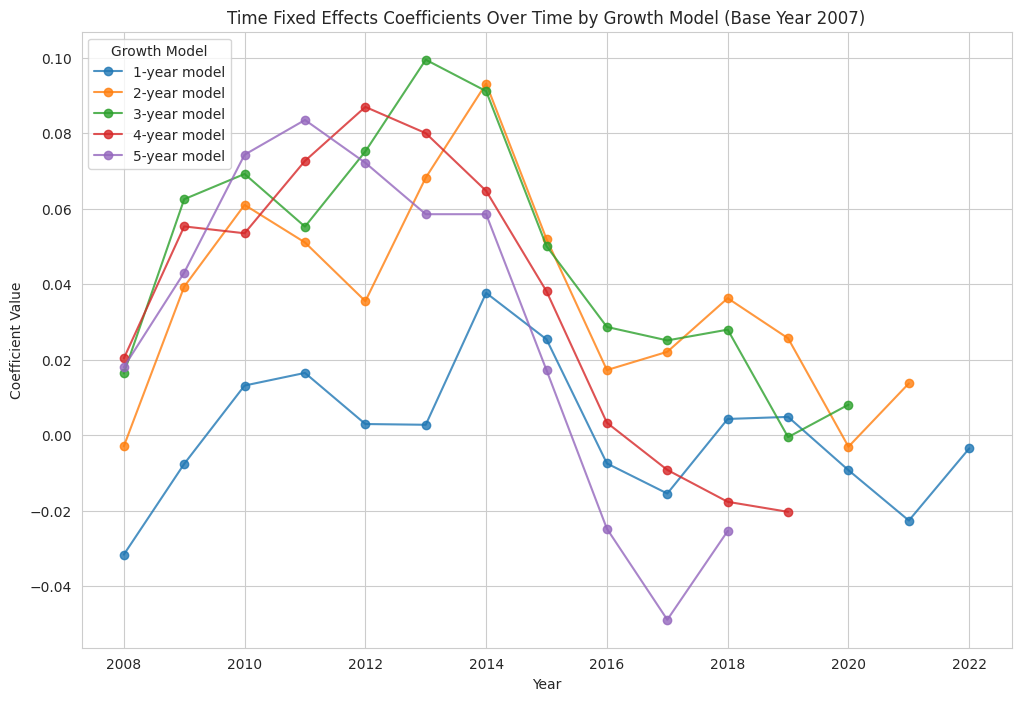

In [16]:
# Define the full range of years across all models
all_years = list(range(2007, 2023))

# Initialize a dictionary to hold coefficients, using NaN for unavailable years
coeffs = {
    "1-year model": [model_params[1].get(f'Year_t_{year}', np.nan) for year in all_years],
    "2-year model": [model_params[2].get(f'Year_t_{year}', np.nan) for year in all_years],
    "3-year model": [model_params[3].get(f'Year_t_{year}', np.nan) for year in all_years],
    "4-year model": [model_params[4].get(f'Year_t_{year}', np.nan) for year in all_years],
    "5-year model": [model_params[5].get(f'Year_t_{year}', np.nan) for year in all_years]
}

# Create a DataFrame for plotting
coeff_df = pd.DataFrame(coeffs, index=all_years)

# Plotting
plt.figure(figsize=(12, 8))
for model in coeff_df.columns:
    plt.plot(coeff_df.index, coeff_df[model], marker='o', label=model, linestyle='-', alpha=0.8)

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("Coefficient Value")
plt.title("Time Fixed Effects Coefficients Over Time by Growth Model (Base Year 2007)")
plt.legend(title="Growth Model", loc='upper left')
plt.grid(True)
plt.show()

In [17]:
one_year_noi_growth_model_params = model_params[1]
five_year_noi_growth_model_params = model_params[5]

In [18]:
df_5yr_growth[['Actual_5yr_Growth','pred_5yr_NOI_Growth']].describe(percentiles=[0.05,0.25,0.75,0.95])

,Actual_5yr_Growth,pred_5yr_NOI_Growth
count,53634.0000,53634.0000
mean,0.0542,0.0542
std,0.2378,0.0625
min,-0.5000,-0.2296
5%,-0.3332,-0.0554
25%,-0.0989,0.0132
50%,0.0452,0.0571
75%,0.1947,0.1013
95%,0.4629,0.1474
max,0.9997,0.2968


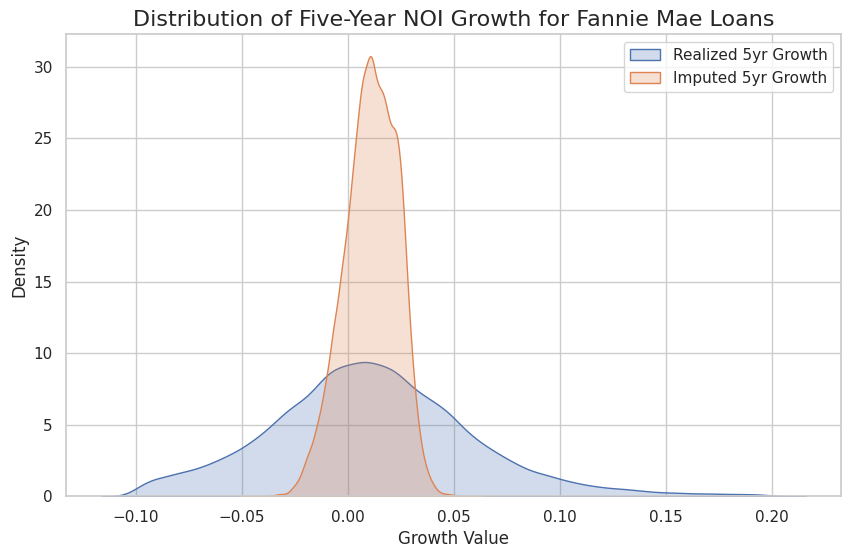

In [19]:
# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the distribution for each column in an overlayed manner
sns.kdeplot(df_5yr_growth['Actual_5yr_Growth']/5, label='Realized 5yr Growth', fill=True)
sns.kdeplot(df_5yr_growth['pred_5yr_NOI_Growth']/5, label='Imputed 5yr Growth', fill=True)
#sns.kdeplot(df_5yr_growth['pred_5yr_cumulative_NOI_Growth'], label='Predicted 5yr Cumulative NOI Growth', fill=True)

# Adding titles and labels
plt.title("Distribution of Five-Year NOI Growth for Fannie Mae Loans", fontsize=16)
plt.xlabel("Growth Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [20]:
mortgage_activity = pd.read_pickle('mortgage_activity.pickle')

In [21]:
mortgage_activity = mortgage_activity[(mortgage_activity['Property State'] != 'Multiple Properties') 
                                      & (mortgage_activity['Note Year'] != 2024)]

In [22]:
mortgage_activity['Building Age_sq'] = mortgage_activity['Building Age'] ** 2
prepared_X = mortgage_activity[['Loan Number','Log Real Underwritten Home Value Per Unit','ln_median_income','Building Age','Building Age_sq'
                          ,'Log Real Underwritten Annual NCF Per Unit','log_Num_Unit'
                          ,'Property State','Note Year']]
#prepared_X['Year_t'] = prepared_X['Year+0'] 
#prepared_X.drop(columns=['Year+0'],inplace=True)
#prepared_X = prepared_X[(prepared_X['Actual_5yr_Growth']>-0.5)&(prepared_X['Actual_5yr_Growth']<0.6)]
prepared_X = pd.get_dummies(prepared_X, columns=['Note Year'], drop_first=True)
prepared_X = pd.get_dummies(prepared_X, columns=['Property State'], drop_first=False)
prepared_X.drop(columns=['Property State_NY'],inplace=True)
prepared_X.dropna(inplace=True)
prepared_X = prepared_X.astype({col: int for col in prepared_X.columns if prepared_X[col].dtype == bool})

independent_vars = [col for col in prepared_X .columns if col not in ['Log Real Underwritten Home Value Per Unit','Loan Number']]

X = prepared_X [independent_vars]
X = sm.add_constant(X)
y = prepared_X ['Log Real Underwritten Home Value Per Unit']
fannie_home_value_model = sm.OLS(y, X).fit()

prepared_X['home_resid'] = fannie_home_value_model.resid
# Merge 'home_resid' into each df_xyr_growth dataframe
for T in range(5, 0, -1):
    df = globals()[f'df_{T}yr_growth']  # Access each df_xyr_growth dynamically
    globals()[f'df_{T}yr_growth'] = df.merge(prepared_X[['Loan Number', 'home_resid']], on='Loan Number', how='left')
fannie_home_value_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Log Real Underwritten Home Value Per Unit   R-squared:                       0.901
Model:                                                   OLS   Adj. R-squared:                  0.901
Method:                                        Least Squares   F-statistic:                     7373.
Date:                                       Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                                               11:09:35   Log-Likelihood:                -5653.7
No. Observations:                                      64313   AIC:                         1.147e+04
Df Residuals:                                          64233   BIC:                         1.219e+04
Df Model:                                                 79                                         
Covariance Type:                                   nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         1.4711      0.038     39.167      0.000       1.397       1.545
ln_median_income                              0.1396      0.003     42.974      0.000       0.133       0.146
Building Age                                 -0.0020      0.000    -17.313      0.000      -0.002      -0.002
Building Age_sq                            2.293e-05   1.07e-06     21.407      0.000    2.08e-05     2.5e-05
Log Real Underwritten Annual NCF Per Unit     0.9481      0.002    566.994      0.000       0.945       0.951
log_Num_Unit                                  0.0131      0.001     10.395      0.000       0.011       0.016
Note Year_2001                                0.0770      0.010      7.359      0.000       0.057       0.098
Note Year_2002                                0.1153      0.011     10.419      0.000       0.094       0.137
Note Year_2003                                0.2201      0.011     20.469      0.000       0.199       0.241
Note Year_2004                                0.2605      0.011     23.146      0.000       0.238       0.283
Note Year_2005                                0.3543      0.011     32.892      0.000       0.333       0.375
Note Year_2006                                0.3305      0.011     31.063      0.000       0.310       0.351
Note Year_2007                                0.3944      0.010     38.854      0.000       0.374       0.414
Note Year_2008                                0.3934      0.010     39.413      0.000       0.374       0.413
Note Year_2009                                0.2914      0.010     28.000      0.000       0.271       0.312
Note Year_2010                                0.3182      0.010     30.605      0.000       0.298       0.339
Note Year_2011                                0.3690      0.010     36.427      0.000       0.349       0.389
Note Year_2012                                0.4679      0.010     47.804      0.000       0.449       0.487
Note Year_2013                                0.4242      0.010     42.439      0.000       0.405       0.444
Note Year_2014                                0.3780      0.010     36.680      0.000       0.358       0.398
Note Year_2015                                0.4400      0.010     43.890      0.000       0.420       0.460
Note Year_2016                                0.4508      0.010     45.565      0.000       0.431       0.470
Note Year_2017                                0.4688      0.010     48.023      

## Compare Returns for Fannie Mae Loans with Realized 5yr growth and predicted 5yr growth

In [23]:
# Define parameters
beta1 = fannie_home_value_model.params['ln_median_income']
beta2 = fannie_home_value_model.params['Building Age']
beta3 = fannie_home_value_model.params['Building Age_sq']
beta4 = fannie_home_value_model.params['Log Real Underwritten Annual NCF Per Unit']

# Define the compute_cap_gain function
def compute_cap_gain(row, params, A, T, noi_growth_column):
    beta_t = params.get(f'Note Year_{row["Year+0"]}', 0)
    beta_t_plus_T = params.get(f'Note Year_{row[f"Year+{T}"]}', 0)
    
    # Calculate the capital gain for T years
    cap_gain_Tyr = (
        beta1 * (row[f'ln_median_income+{T}'] - row['ln_median_income+0']) +
        beta2 * T +
        beta3 * (row[f'Building Age+{T}'] - row['Building Age+0']) +
        beta4 * row[noi_growth_column] +
        (beta_t_plus_T - beta_t) +
        (A - 1) * row['home_resid']
    )
    
    # Annualize the capital gain
    cap_gain = cap_gain_Tyr / T
    return cap_gain

# Loop through each dataframe and compute Hedonic and Total returns
for T in range(5, 0, -1):
    df = globals()[f'df_{T}yr_growth']  # Access each df_xyr_growth dynamically
    noi_growth_column = f'Actual_{T}yr_Growth'  # Dynamically set the NOI growth column

    # Apply the function to generate Hedonic Ret and Total Ret for both A=0 and A=1
    df[f'Hedonic Ret A=0 (Actual {T}yr_NOI)'] = df.apply(
        compute_cap_gain, params=fannie_home_value_model.params, A=0, T=T, noi_growth_column=noi_growth_column, axis=1
    )
    df[f'Hedonic Ret A=1 (Actual {T}yr_NOI)'] = df.apply(
        compute_cap_gain, params=fannie_home_value_model.params, A=1, T=T, noi_growth_column=noi_growth_column, axis=1
    )
    
    # Calculate the Total Returns by adding Underwritten Cap Rate
    df[f'Total Ret A=0 (Actual {T}yr_NOI)'] = df[f'Hedonic Ret A=0 (Actual {T}yr_NOI)'] + df['Underwritten Cap Rate']
    df[f'Total Ret A=1 (Actual {T}yr_NOI)'] = df[f'Hedonic Ret A=1 (Actual {T}yr_NOI)'] + df['Underwritten Cap Rate']

In [24]:
beta1 = fannie_home_value_model.params['ln_median_income']
beta2 = fannie_home_value_model.params['Building Age']
beta4 = fannie_home_value_model.params['Log Real Underwritten Annual NCF Per Unit']
# Define the compute_cap_gain function with flexibility to handle different NOI growth types
def compute_cap_gain(row, params, A, T=5, noi_growth_column='5yr_NOI_Growth'):
    # Assuming 'params' is a dictionary or a similar object that stores values
    beta_t = params.get(f'Note Year_{row["Year+0"]}', 0)
    beta_t_plus_T = params.get(f'Note Year_{row["Year+5"]}', 0)
    
    # Use parentheses to wrap the multiline expression
    cap_gain_5yr = (
        beta1 * (row['ln_median_income+5'] - row['ln_median_income+0']) +
        beta2 * T +
        beta4 * row[noi_growth_column] +  # Dynamically use the specified NOI growth column
        (beta_t_plus_T - beta_t) +
        (A - 1) * row['home_resid']
    )
    
    # Compute the annualized capital gain
    cap_gain = cap_gain_5yr / T

    return cap_gain

# Using 'pred_5yr_direct_NOI_Growth'
df_5yr_growth['Hedonic Ret A=0 (Direct NOI)'] = df_5yr_growth.apply(compute_cap_gain, params=fannie_home_value_model.params, A=0, noi_growth_column='pred_5yr_NOI_Growth', axis=1)
df_5yr_growth['Hedonic Ret A=1 (Direct NOI)'] = df_5yr_growth.apply(compute_cap_gain, params=fannie_home_value_model.params, A=1, noi_growth_column='pred_5yr_NOI_Growth', axis=1)
df_5yr_growth['Total Ret A=0 (Direct NOI)'] = df_5yr_growth['Hedonic Ret A=0 (Direct NOI)'] + df_5yr_growth['Underwritten Cap Rate']
df_5yr_growth['Total Ret A=1 (Direct NOI)'] = df_5yr_growth['Hedonic Ret A=1 (Direct NOI)'] + df_5yr_growth['Underwritten Cap Rate']

In [25]:
df_5yr_growth[[
    #'Underwritten Cap Rate',
    #'Hedonic Ret A=0 (Actual 5yr_NOI)',
    #'Hedonic Ret A=1 (Actual 5yr_NOI)',
    'Total Ret A=0 (Actual 5yr_NOI)',
    'Total Ret A=1 (Actual 5yr_NOI)',
    #'Hedonic Ret A=0 (Direct NOI)',
    #'Hedonic Ret A=1 (Direct NOI)',
    'Total Ret A=0 (Direct NOI)',
    'Total Ret A=1 (Direct NOI)'
]].describe(percentiles=[0.05, 0.25, 0.75, 0.95])

,Total Ret A=0 (Actual 5yr_NOI),Total Ret A=1 (Actual 5yr_NOI),Total Ret A=0 (Direct NOI),Total Ret A=1 (Direct NOI)
count,53634.0000,53634.0000,53634.0000,53634.0000
mean,0.0994,0.1000,0.0994,0.1000
std,0.0806,0.0526,0.0673,0.0295
min,-0.7279,-0.0891,-0.6924,-0.0166
5%,-0.0174,0.0171,0.0063,0.0508
25%,0.0560,0.0643,0.0653,0.0793
50%,0.1012,0.0976,0.1042,0.0995
75%,0.1467,0.1334,0.1393,0.1220
95%,0.2197,0.1893,0.1895,0.1469
max,0.5874,0.3332,0.5306,0.2713


In [26]:
df_5yr_growth[[
    #'Underwritten Cap Rate',
    #'Hedonic Ret A=0 (Actual 5yr_NOI)',
    #'Hedonic Ret A=1 (Actual 5yr_NOI)',
    'Total Ret A=0 (Actual 5yr_NOI)',
    'Total Ret A=1 (Actual 5yr_NOI)',
    #'Hedonic Ret A=0 (Direct NOI)',
    #'Hedonic Ret A=1 (Direct NOI)',
    'Total Ret A=0 (Direct NOI)',
    'Total Ret A=1 (Direct NOI)'
]].describe(percentiles=[0.05, 0.25, 0.75, 0.95])

,Total Ret A=0 (Actual 5yr_NOI),Total Ret A=1 (Actual 5yr_NOI),Total Ret A=0 (Direct NOI),Total Ret A=1 (Direct NOI)
count,53634.0000,53634.0000,53634.0000,53634.0000
mean,0.0994,0.1000,0.0994,0.1000
std,0.0806,0.0526,0.0673,0.0295
min,-0.7279,-0.0891,-0.6924,-0.0166
5%,-0.0174,0.0171,0.0063,0.0508
25%,0.0560,0.0643,0.0653,0.0793
50%,0.1012,0.0976,0.1042,0.0995
75%,0.1467,0.1334,0.1393,0.1220
95%,0.2197,0.1893,0.1895,0.1469
max,0.5874,0.3332,0.5306,0.2713


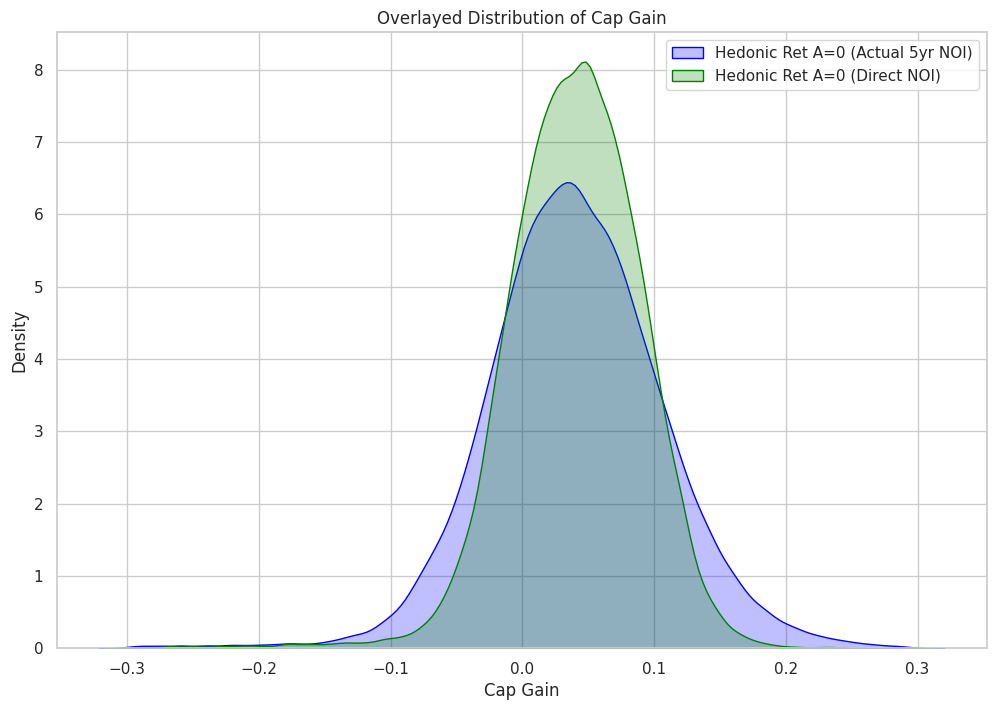

In [27]:
# Define the lower and upper bounds
lb = -0.3
up = 0.3

# Filter the data to include only values between lb and up for all Hedonic Returns
filtered_df = df_5yr_growth[
    (df_5yr_growth['Hedonic Ret A=0 (Actual 5yr_NOI)'].between(lb, up)) &
    (df_5yr_growth['Hedonic Ret A=1 (Actual 5yr_NOI)'].between(lb, up)) &
    (df_5yr_growth['Hedonic Ret A=0 (Direct NOI)'].between(lb, up)) &
    (df_5yr_growth['Hedonic Ret A=1 (Direct NOI)'].between(lb, up))
]

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the distribution of 'Hedonic Ret A=0 (Actual 5yr_NOI)'
sns.kdeplot(filtered_df['Hedonic Ret A=0 (Actual 5yr_NOI)'], label='Hedonic Ret A=0 (Actual 5yr NOI)', shade=True, color='blue')

# Plot the distribution of 'Hedonic Ret A=1 (Actual 5yr_NOI)'
#sns.kdeplot(filtered_df['Hedonic Ret A=1 (Actual 5yr_NOI)'], label='Hedonic Ret A=1 (Actual 5yr NOI)', shade=True, color='red')

# Plot the distribution of 'Hedonic Ret A=0 (Direct NOI)'
sns.kdeplot(filtered_df['Hedonic Ret A=0 (Direct NOI)'], label='Hedonic Ret A=0 (Direct NOI)', shade=True, color='green')

# Plot the distribution of 'Hedonic Ret A=1 (Direct NOI)'
#sns.kdeplot(filtered_df['Hedonic Ret A=1 (Direct NOI)'], label='Hedonic Ret A=1 (Direct NOI)', shade=True, color='orange')

# Set title and labels
plt.title('Overlayed Distribution of Cap Gain')
plt.xlabel('Cap Gain')
plt.ylabel('Density')

# Add legend
plt.legend()

# Display the plot
plt.show()


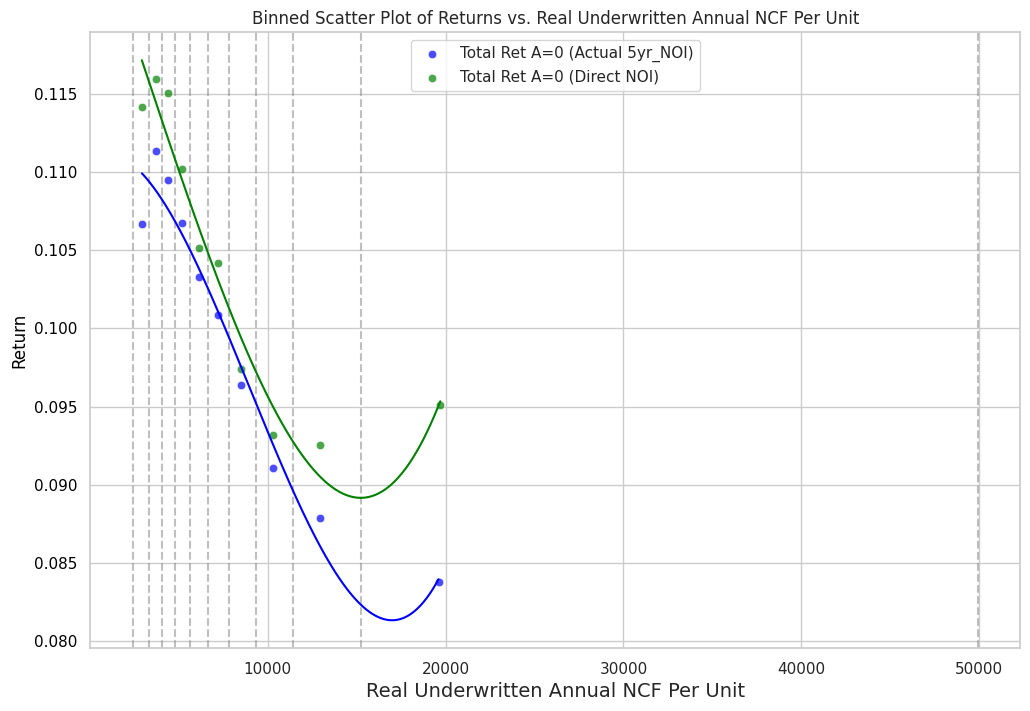

In [28]:
# Function to plot binned scatter plots for multiple return columns in the same graph
def plot_binned_scatter_combined_adjusted(data, return_columns, num_bins=10):
    # Apply binning once based on Real Underwritten Annual NCF Per Unit
    data_filtered = data[(data['Real Underwritten Annual NCF Per Unit'] >= 2400) & (data['Real Underwritten Annual NCF Per Unit'] <= 50000)]
    
    # Create bins for Real Underwritten Annual NCF Per Unit using qcut
    data_filtered['NOI_Bin'], bin_edges = pd.qcut(data_filtered['Real Underwritten Annual NCF Per Unit'], q=num_bins, retbins=True, duplicates='drop')

    # Initialize a figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot vertical lines indicating bins
    for edge in bin_edges:
        ax.axvline(edge, color='grey', linestyle='--', alpha=0.5)

    # Loop through each return column to create binned scatter plots
    colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add more colors if needed
    for i, ret_col in enumerate(return_columns):
        # Apply individual filtering for each return column
        data_filtered_column = data_filtered[(data_filtered[ret_col] >= -0.1) & (data_filtered[ret_col] <= 0.24)]
        
        # Calculate the mean NOI and dependent variable for each bin for this return column
        binned_data = data_filtered_column.groupby('NOI_Bin').agg({
            'Real Underwritten Annual NCF Per Unit': 'median',
            ret_col: 'median'
        }).reset_index().rename(columns={'Real Underwritten Annual NCF Per Unit': 'mean_noi'})
        
        # Plot data points for the current return column
        sns.scatterplot(
            data=binned_data,
            x='mean_noi',
            y=ret_col,
            ax=ax,
            color=colors[i % len(colors)],  # Cycle through the color list
            alpha=0.7,
            label=ret_col
        )

        # Fit a spline through the binned data points for the current return column
        spline = UnivariateSpline(binned_data['mean_noi'], binned_data[ret_col], s=1)
        x_spline = np.linspace(min(binned_data['mean_noi']), max(binned_data['mean_noi']), 500)
        y_spline = spline(x_spline)
        ax.plot(x_spline, y_spline, color=colors[i % len(colors)])

    # Add labels and title
    ax.set_xlabel('Real Underwritten Annual NCF Per Unit', fontsize=14)
    ax.set_ylabel('Return', color='black')
    ax.tick_params(axis='y', labelcolor='black')
    plt.title('Binned Scatter Plot of Returns vs. Real Underwritten Annual NCF Per Unit')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example of how to call the function
return_columns = [
    #'Hedonic Ret A=0 (Actual 5yr_NOI)', 
    #'Hedonic Ret A=1 (Actual 5yr_NOI)',
    'Total Ret A=0 (Actual 5yr_NOI)', 
    #'Total Ret A=1 (Actual 5yr_NOI)',
    #'Hedonic Ret A=0 (Direct NOI)', 
    #'Hedonic Ret A=1 (Direct NOI)',
    'Total Ret A=0 (Direct NOI)', 
    #'Total Ret A=1 (Direct NOI)'
]

# Plot for the selected return columns
plot_binned_scatter_combined_adjusted(df_5yr_growth, return_columns)

## Now we move on Crediq Data that cover also Freddie, Conduit/CRE CLO loans that we do not observe NCF growths but use the Fannie NCF growths model to first imputed growths rates and then predict the captial gain

In [29]:
mf_usa_census = pd.read_pickle('mf_usa_census.pickle')
census = pd.read_pickle('census.pickle')
# Rename ZIP to zip in the census dataframe
census.rename(columns={'ZIP': 'zip','Year':'origination_year'}, inplace=True)
census = census[['median_income', 'origination_year', 'black_ratio', 'poverty_ratio', 'zip']]
census.dropna(subset=['median_income'], inplace=True)
mf_usa_census['building_age_sq'] = mf_usa_census['building_age']**2
mf_usa_census['year_built'].fillna(mf_usa_census['origination_year']-mf_usa_census['building_age'],inplace=True)
# Add a new column for origination year + 5, capped at 2023, and calculate T
mf_usa_census['origination_year_+T'] = (mf_usa_census['origination_year'] + 5).clip(upper=2023)
mf_usa_census['T'] = mf_usa_census['origination_year_+T'] - mf_usa_census['origination_year']

# Create columns for origination year increments (1 to 5)
for i in range(1, 6):
    mf_usa_census[f'origination_year+{i}'] = mf_usa_census['origination_year'] + i

# Replace values greater than 2023 with NaN in the newly created columns
columns_to_replace = [f'origination_year+{i}' for i in range(1, 6)]
mf_usa_census[columns_to_replace] = mf_usa_census[columns_to_replace].where(
    mf_usa_census[columns_to_replace] <= 2023, np.nan
)

# Create corresponding building age columns for each year increment
for i in range(1, 6):
    mf_usa_census[f'building_age+{i}'] = mf_usa_census[f'origination_year+{i}'] - mf_usa_census['year_built']
    mf_usa_census[f'building_age_sq+{i}'] = mf_usa_census[f'building_age+{i}']**2
# Prepare census data
census['origination_year'] = census['origination_year'].astype(float)
census['ln_median_income'] = np.log(census['median_income'])

# Perform merge_asof for each year increment (1 to 5)
for i in range(1, 6):
    if f'origination_year+{i}' in mf_usa_census.columns:
        # Temporary fill for missing origination years
        mf_usa_census[f'origination_year+{i}'] = mf_usa_census[f'origination_year+{i}'].fillna(3000)
        
        # Merge with census data for the corresponding year increment
        mf_usa_census = pd.merge_asof(
            mf_usa_census.sort_values(by=[f'origination_year+{i}', 'zip']),
            census[['origination_year', 'zip', 'ln_median_income']].sort_values(by=['origination_year', 'zip']),
            left_on=[f'origination_year+{i}'],
            right_on=['origination_year'],
            left_by=['zip'],
            right_by=['zip'],
            direction='nearest',
            suffixes=('', f'_census+{i}')
        )
        
        # Clean up the merged columns
        mf_usa_census.loc[mf_usa_census[f'origination_year+{i}'] == 3000, f'ln_median_income_census+{i}'] = np.nan
        mf_usa_census.loc[mf_usa_census[f'origination_year+{i}'] == 3000, f'origination_year+{i}'] = np.nan
        mf_usa_census = mf_usa_census.drop(columns=[f'origination_year_census+{i}'])
    else:
        print(f"Column 'origination_year+{i}' does not exist in mf_usa_census.")

# Add baseline columns for year 0 (original values)
mf_usa_census['ln_median_income_census+0'] = mf_usa_census['ln_median_income']
mf_usa_census['origination_year+0'] = mf_usa_census['origination_year']
mf_usa_census['building_age+0'] = mf_usa_census['building_age']
mf_usa_census['building_age_sq+0'] = mf_usa_census['building_age_sq']
# Drop rows where 'deal_type' is 'fannie_mae' and 'Real Underwritten Annual NCF Per Unit' is NaN
mf_usa_census = mf_usa_census[~((mf_usa_census['deal_type'] == 'fannie_mae') & (mf_usa_census['Real Underwritten Annual NCF Per Unit'].isna()))]
# First, create the 'Log Real Underwritten Annual NCF Per Unit' column
mf_usa_census['Log Real Underwritten Annual NCF Per Unit'] = np.log(mf_usa_census['Real Underwritten Annual NCF Per Unit'])
mf_usa_census['log_Num_Unit'] = np.log(mf_usa_census['Property Acquisition Total Unit Count'])
# Now fill missing values in 'Log Real Underwritten Annual NCF Per Unit' with 'ln_real_uw_noi_per_size'
mf_usa_census['log_noi_per_unit'] = mf_usa_census['Log Real Underwritten Annual NCF Per Unit'].fillna(mf_usa_census['ln_real_uw_noi_per_size'])

In [30]:
mf_usa_census.drop(columns=['Real Underwritten Annual NCF Per Unit','Log Real Underwritten Annual NCF Per Unit'],inplace=True)

In [31]:
mf_usa_census = mf_usa_census.merge(mortgage_activity[['Loan Number','Log Real Underwritten Annual NCF Per Unit','Real Underwritten Annual NCF Per Unit']],on='Loan Number',how='left')

In [32]:
# Replace values in 'log_noi_per_unit' based on the condition
mf_usa_census['log_noi_per_unit'] = np.where(
    ~mf_usa_census['Log Real Underwritten Annual NCF Per Unit'].isna(),
    mf_usa_census['Log Real Underwritten Annual NCF Per Unit'],
    mf_usa_census['log_noi_per_unit']
)

In [33]:
# Replace values in 'log_noi_per_unit' based on the condition
mf_usa_census['real_uw_noi_per_size'] = np.where(
    ~mf_usa_census['Real Underwritten Annual NCF Per Unit'].isna(),
    mf_usa_census['Real Underwritten Annual NCF Per Unit'],
    mf_usa_census['real_uw_noi_per_size']
)

In [34]:
# Function to compute log_hat_NOI_t+T - logNOI_t for each row, based on T-specific models
def direct_compute_log_hat_NOI_diff(row, model_params):
    T = row['T']
    #log_NOI_t = row['log_noi_per_unit']  # Initial log NOI at time t
          # Handle the case where T=0, return NaN
    if T == 0:
        return np.nan
    # Select the appropriate model based on T
    if T in model_params:
        params = model_params[T]
    else:
        raise ValueError(f"Model for T={T} is not available.")
    
    # Extract coefficients from the selected model's params
    alpha = params['const']  # Deal fixed effect (constant term)
    
    # Dynamically extract the correct ln_median_income_growth coefficient based on T
    beta_1 = params.get(f'ln_median_income_{T}yr_growth', 0)  # Adjusted for each year T
    beta_2 = params.get('Building Age+0', 0)  # Coefficient for building age
    beta_3 = params.get('Physical Occupancy %', 0)  # Coefficient for physical occupancy
    beta_4 = params.get('Loan Acquisition LTV', 0)  # Coefficient for loan acquisition LTV
    beta_5 = params.get('log_Num_Unit', 0)  # Coefficient for property size (number of units)
    beta_6 = params.get('Building Age_sq+0', 0)  # Coefficient for building age squared
    hat_c = params.get('Log Real Underwritten Annual NCF Per Unit', 0)  # Estimated NOI growth rate (adjust as necessary)
    
    # Handle state fixed effect (if applicable)
    state_col = f"Property State_{row['state']}"
    alpha_s = params.get(state_col, 0)  # Default to 0 if state coefficient is missing
    alpha_t = params.get(f'Year_t_{int(row["origination_year+0"])}', 0)
    
    # Calculate the log median income growth for the relevant period
    ln_median_income_growth = row[f'ln_median_income_census+{T}'] - row['ln_median_income_census+0']
    
    # Compute the NOI growth using the selected model's coefficients
    noi_growth = (alpha + alpha_s + alpha_t 
                  + beta_1 * ln_median_income_growth
                  + beta_2 * row['building_age+0']
                  + beta_6 * row['building_age_sq+0']
                  + beta_3 * row['most_recent_occupancy']
                  + beta_4 * row['loan_ltv']
                  + beta_5 * row['ln_prop_size']
                  + hat_c * row['log_noi_per_unit'])
    
    # Return the computed NOI growth value
    return noi_growth

# Applying the function to each row in the dataframe
mf_usa_census['predicted_noi_growth'] = mf_usa_census.apply(direct_compute_log_hat_NOI_diff, axis=1, model_params=model_params)
mf_usa_census['predicted_noi_growth'] = pd.to_numeric(mf_usa_census['predicted_noi_growth'],errors='coerce')

In [35]:
mf_usa_census['predicted_noi_growth'].describe(percentiles=[0.05,0.25,0.75,0.95])

count   83955.0000
mean        0.1231
std         0.0666
min        -0.1743
5%          0.0341
25%         0.0673
50%         0.1152
75%         0.1699
95%         0.2441
max         0.3752
Name: predicted_noi_growth, dtype: float64

In [36]:
# Perform the merge
mf_usa_census = mf_usa_census.merge(
    annual_performance[['Loan Number', 'Year', 'Log Real Year NCF Per Unit']],
    left_on=['Loan Number', 'origination_year_+T'],
    right_on=['Loan Number', 'Year'],
    how='left'
)

# Drop the redundant 'Year' column if needed
mf_usa_census.drop(columns=['Year'], inplace=True)

mf_usa_census['fannie realized noi growth'] = (mf_usa_census['Log Real Year NCF Per Unit'] - mf_usa_census['Log Real Underwritten Annual NCF Per Unit'])
mf_usa_census['fannie realized noi growth'] = mf_usa_census['fannie realized noi growth'].replace([np.inf, -np.inf], np.nan)
mf_usa_census['predicted_noi_growth'] = np.where(
    ~mf_usa_census['fannie realized noi growth'].isna(),  # Check if 'fannie realized noi growth' is not NaN
    mf_usa_census['fannie realized noi growth'],          # Set to 'fannie realized noi growth' if not NaN
    mf_usa_census['predicted_noi_growth']                     # Otherwise, keep the existing value
)

In [37]:
# Calculate statistics for fannie_mae deals
fannie_mae_stats = mf_usa_census[mf_usa_census['deal_type'] == 'fannie_mae']['predicted_noi_growth'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])

# Calculate statistics for non-fannie_mae deals
non_fannie_mae_stats = mf_usa_census[mf_usa_census['deal_type'] != 'fannie_mae']['predicted_noi_growth'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])

# Calculate overall statistics for predicted_noi_growth
overall_stats = mf_usa_census['predicted_noi_growth'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])

# Combine the results into a single dataframe
combined_stats = pd.DataFrame({
    'Overall': overall_stats,
    'Fannie Mae Deals': fannie_mae_stats,
    'Non-Fannie Mae Deals': non_fannie_mae_stats
})
combined_stats

,Overall,Fannie Mae Deals,Non-Fannie Mae Deals
count,83973.0000,34196.0000,49777.0000
mean,0.1134,0.1052,0.1190
std,0.2065,0.3143,0.0633
min,-5.1775,-5.1775,-0.1743
5%,-0.1691,-0.3836,0.0334
25%,0.0550,-0.0172,0.0667
50%,0.1143,0.1205,0.1124
75%,0.1827,0.2541,0.1626
95%,0.4116,0.5677,0.2347
max,1.7876,1.7876,0.3489


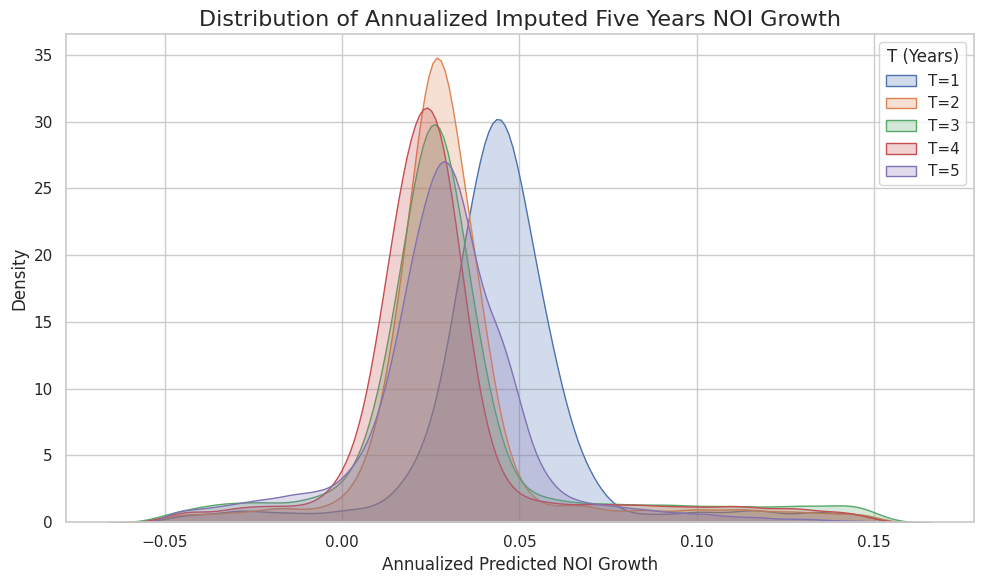

In [38]:
#Filter out rows where T is 0 to avoid division by zero
filtered_mf_usa_census = mf_usa_census[mf_usa_census['T'] != 0]

# Calculate annualized predicted NOI growth
filtered_mf_usa_census['annualized_predicted_noi_growth'] = filtered_mf_usa_census['predicted_noi_growth'] / filtered_mf_usa_census['T']

# Set the plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Loop through each unique value of T and plot the density of 'annualized_predicted_noi_growth'
sns.kdeplot(filtered_mf_usa_census[(filtered_mf_usa_census['T'] == 1) & (filtered_mf_usa_census['annualized_predicted_noi_growth'].between(-0.05, 0.15))]['annualized_predicted_noi_growth'], label=f'T={1}', fill=True)
sns.kdeplot(filtered_mf_usa_census[(filtered_mf_usa_census['T'] == 2) & (filtered_mf_usa_census['annualized_predicted_noi_growth'].between(-0.05, 0.15))]['annualized_predicted_noi_growth'], label=f'T={2}', fill=True)
sns.kdeplot(filtered_mf_usa_census[(filtered_mf_usa_census['T'] == 3) & (filtered_mf_usa_census['annualized_predicted_noi_growth'].between(-0.05, 0.15))]['annualized_predicted_noi_growth'], label=f'T={3}', fill=True)
sns.kdeplot(filtered_mf_usa_census[(filtered_mf_usa_census['T'] == 4) & (filtered_mf_usa_census['annualized_predicted_noi_growth'].between(-0.05, 0.15))]['annualized_predicted_noi_growth'], label=f'T={4}', fill=True)
sns.kdeplot(filtered_mf_usa_census[(filtered_mf_usa_census['T'] == 5) & (filtered_mf_usa_census['annualized_predicted_noi_growth'].between(-0.05, 0.15))]['annualized_predicted_noi_growth'], label=f'T={5}', fill=True)

# Add titles and labels
plt.title('Distribution of Annualized Imputed Five Years NOI Growth', fontsize=16)
plt.xlabel('Annualized Predicted NOI Growth', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='T (Years)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [39]:
# Group by 'T' and compute descriptive statistics for 'annualized_predicted_noi_growth'
filtered_mf_usa_census.groupby('T')['annualized_predicted_noi_growth'].describe(percentiles=[0.05, 0.25, 0.75, 0.95]).transpose()

T,1,2,3,4,5
count,5706.0000,8632.0000,8339.0000,8777.0000,52519.0000
mean,0.0258,0.0454,0.0409,0.0251,0.0255
std,0.2350,0.1217,0.0885,0.0512,0.0364
min,-5.1775,-1.6166,-1.1158,-0.8094,-0.8083
5%,-0.3423,-0.0656,-0.0680,-0.0385,-0.0312
25%,0.0313,0.0206,0.0178,0.0150,0.0178
50%,0.0441,0.0287,0.0275,0.0239,0.0287
75%,0.0574,0.0410,0.0422,0.0324,0.0396
95%,0.3344,0.2711,0.2076,0.1114,0.0671
max,1.0017,0.6258,0.4872,0.3160,0.3575


In [40]:
# Function to compute delta_Y for each row
def compute_delta_Y(row):
    T = row['T']
    delta_Y = row[f'ln_median_income_census+{T}'] - row['ln_median_income_census+0']
    return delta_Y

# Apply the function across the DataFrame to create the new column
mf_usa_census['delta_Y'] = mf_usa_census.apply(compute_delta_Y, axis=1)
#mf_usa_census.drop_duplicates(inplace=True)

dependent_var = 'ln_appraisal_per_size'
regressors = ['_id','state','ln_median_income','building_age','building_age_sq','if_renovated','ln_real_uw_noi_per_size','ln_prop_size','origination_year' ,'deal_type']
regressors.append(dependent_var)
prepeared_X = mf_usa_census[regressors]
prepeared_X.dropna(inplace=True)
if 'deal_type' in prepeared_X.columns:
    prepeared_X = prepeared_X[prepeared_X['deal_type'].isin(['fannie_mae', 'conduit',
                                                             'freddie_mac', 'cre_clo'])]
    prepeared_X = pd.get_dummies(prepeared_X,columns=['deal_type'])
    prepeared_X.drop(columns=['deal_type_fannie_mae'],inplace=True)
    
prepeared_X = pd.get_dummies(prepeared_X,columns=['state','origination_year'],drop_first=False)
prepeared_X.drop(columns=['origination_year_2000','state_NY'],inplace=True)
prepeared_X = prepeared_X.astype({col: int for col in prepeared_X.columns if prepeared_X[col].dtype == bool})
#prepeared_X = prepeared_X.apply(pd.to_numeric, errors='coerce')
prepeared_X.dropna(inplace=True)
y = prepeared_X[dependent_var]
X = prepeared_X.drop(columns=[dependent_var,'_id'])
X['building_age'] = X['building_age'].astype(float)
X['building_age_sq'] = X['building_age_sq'].astype(float)
X = sm.add_constant(X)

# Create the model
crediq_homevalue_model = sm.OLS(y, X).fit()

prepeared_X['home_resid_with_noi'] = crediq_homevalue_model.resid
mf_usa_census = mf_usa_census.merge(prepeared_X[['_id','home_resid_with_noi']],on='_id',how='left')
crediq_homevalue_model.summary()


# NOTE: Inforce Table 2: Hedonic Valuation Model for Log Price Per Unit

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_appraisal_per_size   R-squared:                       0.894
Model:                               OLS   Adj. R-squared:                  0.894
Method:                    Least Squares   F-statistic:                     8599.
Date:                   Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                           11:10:15   Log-Likelihood:                 6482.2
No. Observations:                  85014   AIC:                        -1.280e+04
Df Residuals:                      84930   BIC:                        -1.201e+04
Df Model:                             83                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.2751      0.031     40.582      0.000       1.213       1.337
ln_median_income            0.1032      0.002     42.376      0.000       0.098       0.108
building_age               -0.0018    8.5e-05    -21.151      0.000      -0.002      -0.002
building_age_sq          1.683e-05   7.26e-07     23.164      0.000    1.54e-05    1.82e-05
if_renovated               -0.0135      0.002     -6.342      0.000      -0.018      -0.009
ln_real_uw_noi_per_size     1.0051      0.002    541.058      0.000       1.002       1.009
ln_prop_size                0.0054      0.001      6.457      0.000       0.004       0.007
deal_type_conduit           0.0441      0.003     13.694      0.000       0.038       0.050
deal_type_cre_clo           0.2062      0.005     38.888      0.000       0.196       0.217
deal_type_freddie_mac       0.0247      0.002     12.520      0.000       0.021       0.029
state_AK                   -0.3315      0.025    -13.327      0.000      -0.380      -0.283
state_AL                   -0.1610      0.008    -19.958      0.000      -0.177      -0.145
state_AR                   -0.1818      0.011    -17.309      0.000      -0.202      -0.161
state_AZ                   -0.0298      0.006     -5.253      0.000      -0.041      -0.019
state_CA                    0.0483      0.004     12.843      0.000       0.041       0.056
state_CO                   -0.0446      0.006     -7.674      0.000      -0.056      -0.033
state_CT                   -0.1813      0.008    -23.994      0.000      -0.196      -0.167
state_DC                   -0.0297      0.012     -2.573      0.010      -0.052      -0.007
state_DE                   -0.1322      0.017     -8.010      0.000      -0.165      -0.100
state_FL                   -0.0845      0.005    -18.210      0.000      -0.094      -0.075
state_GA                   -0.1251      0.005    -24.193      0.000      -0.135      -0.115
state_HI                   -0.0133      0.029     -0.454      0.650      -0.071       0.044
state_IA                   -0.1668      0.012    -14.011      0.000      -0.190      -0.143
state_ID                   -0.0769      0.014     -5.618      0.000      -0.104      -0.050
state_IL                   -0.1551      0.005    -29.772      0.000      -0.165      -0.145
state_IN                   -0.1932      0.007    -26.418      0.000      -0.208      -0.179
state_KS                   -0.1725      0.010    -17.658      0.000      -0.192      -0.153
state_KY                   -0.1915      0.009    -20.642      0.000      -0.210      -0.173
state_LA                   -0.1790      0.009    -20.391      0.000      -0.196      -0.162
state_MA                   -0.0595      0.008     -7.854      0.000      -0.074      -0.045
state_MD      

In [41]:
beta_1 = crediq_homevalue_model.params['ln_median_income']
beta_2 = crediq_homevalue_model.params['building_age']
beta_6 = crediq_homevalue_model.params['building_age_sq']
beta_4 = crediq_homevalue_model.params['ln_real_uw_noi_per_size']


# Function to compute log_hat_NOI_t+T - logNOI_t for each row
def compute_cap_gain(row,params, A=0):
    T = row['T']
    building_age_sq_dif = row[f'building_age_sq+{T}'] - row['building_age_sq+0']
    # Retrieve year-specific coefficients
    orig_year = int(row['origination_year+0'])
    orig_year_T = int(row['origination_year_+T'])
    
    beta_t = params.get(f"origination_year_{orig_year}", 0) 
    beta_T = params.get(f"origination_year_{orig_year_T}", 0)

    # Compute cumulative growth
    cum_growth = (
        beta_1 * row['delta_Y'] +
        beta_2 * T +
        beta_6 * building_age_sq_dif +
        beta_4 * row['predicted_noi_growth'] +
        (beta_T - beta_t) +
        (A - 1) * row['home_resid_with_noi']
    )

    # Compute Cap Gain
    cap_gain = cum_growth / T
    
    return cap_gain

# Apply the function to the dataframe for A=0, A=0.5, and A=1
mf_usa_census['hedonic_ret_A=0'] = mf_usa_census.apply(compute_cap_gain, axis=1, args=(crediq_homevalue_model.params, 0))
mf_usa_census['hedonic_ret_A=0.5'] = mf_usa_census.apply(compute_cap_gain, axis=1, args=(crediq_homevalue_model.params, 0.5))
mf_usa_census['hedonic_ret_A=1'] = mf_usa_census.apply(compute_cap_gain, axis=1, args=(crediq_homevalue_model.params, 1))

# Handle infinities and non-numeric entries
mf_usa_census[['hedonic_ret_A=0', 'hedonic_ret_A=0.5', 'hedonic_ret_A=1']] = (
    mf_usa_census[['hedonic_ret_A=0', 'hedonic_ret_A=0.5', 'hedonic_ret_A=1']]
    .replace([np.inf, -np.inf], np.nan)
    .apply(pd.to_numeric, errors='coerce')
)

# Calculate total returns for each case
mf_usa_census['total_ret_A=0'] = mf_usa_census['hedonic_ret_A=0'] + mf_usa_census['cap_rate']
mf_usa_census['total_ret_A=0.5'] = mf_usa_census['hedonic_ret_A=0.5'] + mf_usa_census['cap_rate']
mf_usa_census['total_ret_A=1'] = mf_usa_census['hedonic_ret_A=1'] + mf_usa_census['cap_rate']

In [42]:
mf_usa_census[['hedonic_ret_A=0', 'hedonic_ret_A=0.5','hedonic_ret_A=1','total_ret_A=0','total_ret_A=0.5','total_ret_A=1']].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,hedonic_ret_A=0,hedonic_ret_A=0.5,hedonic_ret_A=1,total_ret_A=0,total_ret_A=0.5,total_ret_A=1
count,84700.0000,84700.0000,84700.0000,84700.0000,84700.0000,84700.0000
mean,0.0391,0.0391,0.0392,0.0957,0.0957,0.0958
std,0.1162,0.0965,0.0886,0.1216,0.1006,0.0904
min,-5.3011,-5.2911,-5.2812,-5.2523,-5.2424,-5.2324
5%,-0.1084,-0.0732,-0.0435,-0.0659,-0.0282,0.0050
25%,0.0144,0.0212,0.0234,0.0661,0.0728,0.0767
50%,0.0496,0.0477,0.0461,0.1066,0.1044,0.1031
75%,0.0792,0.0688,0.0621,0.1418,0.1309,0.1221
95%,0.1609,0.1342,0.1259,0.2276,0.2008,0.1867
max,1.3384,0.9102,0.9313,1.4891,0.9529,0.9739


In [43]:
mf_usa_census[['hedonic_ret_A=0', 'hedonic_ret_A=0.5','hedonic_ret_A=1','total_ret_A=0','total_ret_A=0.5','total_ret_A=1']].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,hedonic_ret_A=0,hedonic_ret_A=0.5,hedonic_ret_A=1,total_ret_A=0,total_ret_A=0.5,total_ret_A=1
count,84700.0000,84700.0000,84700.0000,84700.0000,84700.0000,84700.0000
mean,0.0391,0.0391,0.0392,0.0957,0.0957,0.0958
std,0.1162,0.0965,0.0886,0.1216,0.1006,0.0904
min,-5.3011,-5.2911,-5.2812,-5.2523,-5.2424,-5.2324
5%,-0.1084,-0.0732,-0.0435,-0.0659,-0.0282,0.0050
25%,0.0144,0.0212,0.0234,0.0661,0.0728,0.0767
50%,0.0496,0.0477,0.0461,0.1066,0.1044,0.1031
75%,0.0792,0.0688,0.0621,0.1418,0.1309,0.1221
95%,0.1609,0.1342,0.1259,0.2276,0.2008,0.1867
max,1.3384,0.9102,0.9313,1.4891,0.9529,0.9739


In [44]:
mf_usa_census[['hedonic_ret_A=0', 'hedonic_ret_A=0.5','hedonic_ret_A=1','total_ret_A=0','total_ret_A=0.5','total_ret_A=1']].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,hedonic_ret_A=0,hedonic_ret_A=0.5,hedonic_ret_A=1,total_ret_A=0,total_ret_A=0.5,total_ret_A=1
count,84700.0000,84700.0000,84700.0000,84700.0000,84700.0000,84700.0000
mean,0.0391,0.0391,0.0392,0.0957,0.0957,0.0958
std,0.1162,0.0965,0.0886,0.1216,0.1006,0.0904
min,-5.3011,-5.2911,-5.2812,-5.2523,-5.2424,-5.2324
5%,-0.1084,-0.0732,-0.0435,-0.0659,-0.0282,0.0050
25%,0.0144,0.0212,0.0234,0.0661,0.0728,0.0767
50%,0.0496,0.0477,0.0461,0.1066,0.1044,0.1031
75%,0.0792,0.0688,0.0621,0.1418,0.1309,0.1221
95%,0.1609,0.1342,0.1259,0.2276,0.2008,0.1867
max,1.3384,0.9102,0.9313,1.4891,0.9529,0.9739


In [45]:
fannie_loans = mf_usa_census[mf_usa_census['deal_type'] == 'fannie_mae']
non_fannie = mf_usa_census[mf_usa_census['deal_type'] != 'fannie_mae']

## Crediq Fannie Loans

## To keep a fair comparision between Crediq Non-Fannie and Fannie, we need the Fannie that also starts from Underwritten. Thus we needs use the annual performance data of Fannie that compute growth rate from t=0 as Underwritten.

In [46]:
# Load the dictionary from the pickle file
with open('uw_noi_t0_growth_dataframes.pkl', 'rb') as f:
    growth_dataframes = pickle.load(f)

# Access individual dataframes by their keys
uw_noi_t0_df_1yr_growth = growth_dataframes['uw_noi_t0_df_1yr_growth']
uw_noi_t0_df_2yr_growth = growth_dataframes['uw_noi_t0_df_2yr_growth']
uw_noi_t0_df_3yr_growth = growth_dataframes['uw_noi_t0_df_3yr_growth']
uw_noi_t0_df_4yr_growth = growth_dataframes['uw_noi_t0_df_4yr_growth']
uw_noi_t0_df_5yr_growth = growth_dataframes['uw_noi_t0_df_5yr_growth']

In [47]:
# Filter each uw_noi_t0_df_xyr_growth to ensure year difference matches T
for T in range(5, 0, -1):
    df = globals()[f'uw_noi_t0_df_{T}yr_growth']  # Access each uw_noi_t0_df_xyr_growth dynamically
    df = df[(df[f'Year+{T}'] - df['Year+0']) == T]  # Filter rows where the difference is exactly T
    globals()[f'uw_noi_t0_df_{T}yr_growth'] = df  # Update the original variable with filtered data

# Set upper and lower bounds
ub = 1
lb = -0.5

# Function to filter a dataframe based on growth bounds
def filter_growth(df, column_name, lb, ub):
    if df is not None:  # Ensure the dataframe exists
        return df[(df[column_name] >= lb) & (df[column_name] <= ub)]
    return None

# Apply growth bounds filtering for each uw_noi_t0_df_xyr_growth
for T in range(1, 6):
    df = globals()[f'uw_noi_t0_df_{T}yr_growth']  # Access each uw_noi_t0_df_xyr_growth dynamically
    df = filter_growth(df, f'Actual_{T}yr_Growth', lb, ub)  # Filter within bounds
    df.dropna(inplace=True)  # Drop NaN values
    globals()[f'uw_noi_t0_df_{T}yr_growth'] = df  # Update the original variable with filtered data


In [48]:
prepared_X = mortgage_activity[['Loan Number','Log Real Underwritten Home Value Per Unit','ln_median_income','Building Age','Building Age_sq'
                          ,'Log Real Underwritten Annual NCF Per Unit','log_Num_Unit'
                          ,'Property State','Note Year']]
#prepared_X['Year_t'] = prepared_X['Year+0'] 
#prepared_X.drop(columns=['Year+0'],inplace=True)
#prepared_X = prepared_X[(prepared_X['Actual_5yr_Growth']>-0.5)&(prepared_X['Actual_5yr_Growth']<0.6)]
prepared_X = pd.get_dummies(prepared_X, columns=['Note Year'], drop_first=True)
prepared_X = pd.get_dummies(prepared_X, columns=['Property State'], drop_first=False)
prepared_X.drop(columns=['Property State_NY'],inplace=True)
prepared_X.dropna(inplace=True)
prepared_X = prepared_X.astype({col: int for col in prepared_X.columns if prepared_X[col].dtype == bool})

independent_vars = [col for col in prepared_X .columns if col not in ['Log Real Underwritten Home Value Per Unit','Loan Number']]

X = prepared_X [independent_vars]
X = sm.add_constant(X)
y = prepared_X ['Log Real Underwritten Home Value Per Unit']
fannie_home_value_model = sm.OLS(y, X).fit()

prepared_X['home_resid'] = fannie_home_value_model.resid
# Merge 'home_resid' into each df_xyr_growth dataframe
for T in range(5, 0, -1):
    df = globals()[f'uw_noi_t0_df_{T}yr_growth']  # Access each df_xyr_growth dynamically
    globals()[f'uw_noi_t0_df_{T}yr_growth'] = df.merge(prepared_X[['Loan Number', 'home_resid']], on='Loan Number', how='left')


In [49]:
# Define parameters
beta1 = crediq_homevalue_model.params['ln_median_income']
beta2 = crediq_homevalue_model.params['building_age']
beta3 = crediq_homevalue_model.params['building_age_sq']
beta4 = crediq_homevalue_model.params['ln_real_uw_noi_per_size']

# Define the compute_cap_gain function
def compute_cap_gain(row, params, A, T, noi_growth_column):
    beta_t = params.get(f'Note Year_{row["Year+0"]}', 0)
    beta_t_plus_T = params.get(f'Note Year_{row[f"Year+{T}"]}', 0)
    
    # Calculate the capital gain for T years
    cap_gain_Tyr = (
        beta1 * (row[f'ln_median_income+{T}'] - row['ln_median_income+0']) +
        beta2 * T +
        beta3 * (row[f'Building Age_sq+{T}'] - row['Building Age_sq+0']) +
        beta4 * row[noi_growth_column] +
        (beta_t_plus_T - beta_t) 
        + (A - 1) * row['home_resid']
    )
    
    # Annualize the capital gain
    cap_gain = cap_gain_Tyr / T
    return cap_gain

# Loop through each dataframe and compute Hedonic and Total returns
for T in range(5, 0, -1):
    df = globals()[f'uw_noi_t0_df_{T}yr_growth']  # Access each uw_noi_t0_df_xyr_growth dynamically
    noi_growth_column = f'Actual_{T}yr_Growth'  # Dynamically set the NOI growth column

        # Apply the function to generate Hedonic Ret and Total Ret for A=0, A=0.5, and A=1
    for A_value in [0, 0.5, 1]:
        df[f'Hedonic Ret A={A_value} (Actual {T}yr_NOI)'] = df.apply(
            compute_cap_gain, params=fannie_home_value_model.params, A=A_value, T=T, noi_growth_column=noi_growth_column, axis=1
        )
        # Calculate the Total Returns by adding Underwritten Cap Rate
        df[f'Total Ret A={A_value} (Actual {T}yr_NOI)'] = df[f'Hedonic Ret A={A_value} (Actual {T}yr_NOI)'] + df['Underwritten Cap Rate']

In [50]:
cred_fannie_loans = mf_usa_census['Loan Number'].unique()
# List of growth dataframes ordered from 5yr to 1yr
growth_dfs = [
    uw_noi_t0_df_5yr_growth, 
    uw_noi_t0_df_4yr_growth, 
    uw_noi_t0_df_3yr_growth, 
    uw_noi_t0_df_2yr_growth, 
    uw_noi_t0_df_1yr_growth
]

loan_groups = []  # List to store filtered loan groups at each stage

# Initialize remaining loans to all loans in cred_fannie_loans
remaining_loans = set(cred_fannie_loans)

# Loop through each dataframe and filter loans sequentially
for df in growth_dfs:
    # Filter for remaining loans, group by 'Loan Number', and take the first occurrence
    loans_in_current_df = df[df['Loan Number'].isin(remaining_loans)].groupby('Loan Number').head(1)
    loan_groups.append(loans_in_current_df)
    
    # Update remaining loans to exclude those already found
    remaining_loans -= set(loans_in_current_df['Loan Number'])

# Access each loan group without the prefix in variable names
loans_in_5yr, loans_in_4yr, loans_in_3yr, loans_in_2yr, loans_in_1yr = loan_groups

In [51]:
# List to hold dataframes after adding T column
combined_dfs = []

# Loop through each loans_in_xyr and prepare it for concatenation
for T in range(5, 0, -1):
    df = globals()[f'loans_in_{T}yr']  # Access each loans_in_xyr dynamically
    
    # Select and rename columns to have consistent names for Hedonic, Total Returns, and Actual Growth
    selected_df = df[[
        'Loan Number',
        'Year+0',
        'Property State',
        'Underwritten Cap Rate',
        f'Hedonic Ret A=0 (Actual {T}yr_NOI)',
        f'Total Ret A=0 (Actual {T}yr_NOI)',
        f'Hedonic Ret A=0.5 (Actual {T}yr_NOI)',
        f'Total Ret A=0.5 (Actual {T}yr_NOI)',
        f'Hedonic Ret A=1 (Actual {T}yr_NOI)',
        f'Total Ret A=1 (Actual {T}yr_NOI)',
        'Real Underwritten Annual NCF Per Unit',
        f'Actual_{T}yr_Growth'
    ]].copy()  # Copy to avoid setting with copy warnings
    
    # Rename columns to standardized names
    selected_df = selected_df.rename(columns={
        f'Hedonic Ret A=0 (Actual {T}yr_NOI)': 'Hedonic Ret A=0',
        f'Total Ret A=0 (Actual {T}yr_NOI)': 'Total Ret A=0',
        f'Hedonic Ret A=0.5 (Actual {T}yr_NOI)': 'Hedonic Ret A=0.5',
        f'Total Ret A=0.5 (Actual {T}yr_NOI)': 'Total Ret A=0.5',
        f'Hedonic Ret A=1 (Actual {T}yr_NOI)': 'Hedonic Ret A=1',
        f'Total Ret A=1 (Actual {T}yr_NOI)': 'Total Ret A=1',
        f'Actual_{T}yr_Growth': 'Actual Growth'
    })
    
    # Add the T column
    selected_df['T'] = T
    
    # Append to the list
    combined_dfs.append(selected_df)

# Concatenate all dataframes into one
cred_fannie_ret = pd.concat(combined_dfs, ignore_index=True)

## Compare the Two

In [52]:
# Calculate descriptive statistics for non_fannie['predicted_noi_growth']
non_fannie_stats = non_fannie['predicted_noi_growth'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# Calculate descriptive statistics for final_combined_df['Actual Growth']
actual_growth_stats = cred_fannie_ret['Actual Growth'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# Combine both descriptive statistics into a single dataframe
combined_stats = pd.DataFrame({
    'Predicted NOI Growth (Non-Fannie)': non_fannie_stats,
    'Fannie Realized Growth': actual_growth_stats
})
combined_stats

,Predicted NOI Growth (Non-Fannie),Fannie Realized Growth
count,50535.0000,30704.0000
mean,0.1195,0.1264
std,0.0635,0.2743
min,-0.1743,-0.4998
5%,0.0336,-0.3255
25%,0.0670,-0.0610
50%,0.1131,0.1132
75%,0.1634,0.3062
95%,0.2350,0.6009
max,0.3489,0.9988


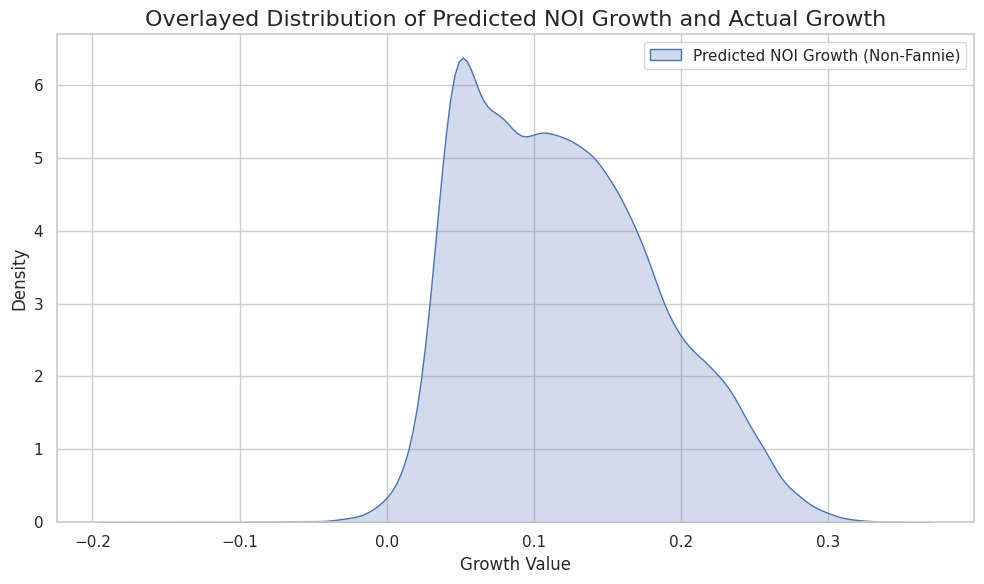

In [53]:
# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the distribution for non_fannie's predicted NOI growth
sns.kdeplot(non_fannie['predicted_noi_growth'], label='Predicted NOI Growth (Non-Fannie)', fill=True)

# Plot the distribution for Actual Growth in final_combined_df
#sns.kdeplot(cred_fannie_ret['Actual Growth'], label='Fannie Realized Growth', fill=True)

# Add titles and labels
plt.title('Overlayed Distribution of Predicted NOI Growth and Actual Growth', fontsize=16)
plt.xlabel('Growth Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

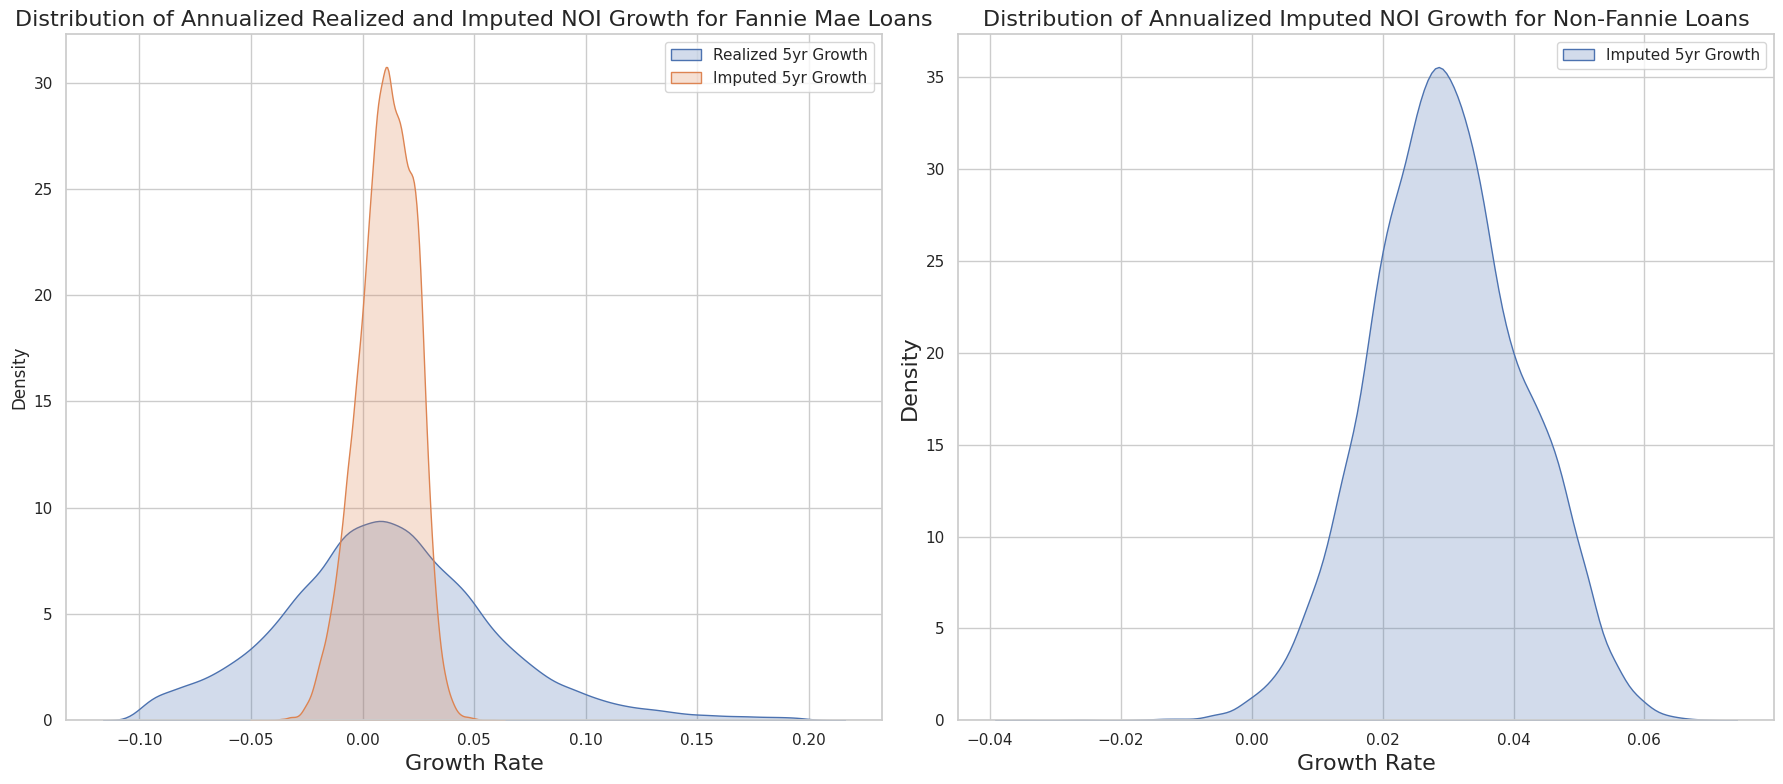

In [54]:
# Set plot size and style
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")

# Create the first subplot (left panel)
plt.subplot(1, 2, 1)
sns.kdeplot(df_5yr_growth['Actual_5yr_Growth']/5, label='Realized 5yr Growth', fill=True)
sns.kdeplot(df_5yr_growth['pred_5yr_NOI_Growth']/5, label='Imputed 5yr Growth', fill=True)
plt.title("Distribution of Annualized Realized and Imputed NOI Growth for Fannie Mae Loans", fontsize=16)
plt.xlabel("Growth Rate", fontsize=16)
plt.ylabel("Density")
plt.legend()

# Filter non_fannie DataFrame for T == 5 and divide predicted_noi_growth by 5
filtered_non_fannie = non_fannie[non_fannie['T'] == 5]
filtered_non_fannie['annualized_predicted_noi_growth'] = filtered_non_fannie['predicted_noi_growth'] / 5

# Create the second subplot (right panel)
plt.subplot(1, 2, 2)
sns.kdeplot(filtered_non_fannie['annualized_predicted_noi_growth'], label='Imputed 5yr Growth', fill=True)
plt.title('Distribution of Annualized Imputed NOI Growth for Non-Fannie Loans', fontsize=16)
plt.xlabel('Growth Rate', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# NOTE: Inforce Figure 7: Annualized Five-year Imputed NOI Growth  Dist_Impute_NOI.png

In [55]:
# Filter the dataframe for non_fannie
filtered_non_fannie = non_fannie[non_fannie['T'] != 0]

# Annualize the predicted NOI growth for non_fannie
filtered_non_fannie['annualized_predicted_noi_growth'] = filtered_non_fannie['predicted_noi_growth'] / filtered_non_fannie['T']

# Group by 'T' and describe the annualized predicted NOI growth for non_fannie
annualized_description_non_fannie = filtered_non_fannie.groupby('T')['annualized_predicted_noi_growth'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).transpose()

# Group by 'T' and describe the non-annualized predicted NOI growth for non_fannie
non_annualized_description_non_fannie = filtered_non_fannie.groupby('T')['predicted_noi_growth'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).transpose()

# For cred_fannie_ret
cred_fannie_ret['annualized_actual_growth'] = cred_fannie_ret['Actual Growth'] / cred_fannie_ret['T']

# Group by 'T' and describe the annualized Actual Growth for cred_fannie_ret
annualized_description_cred_fannie_ret = cred_fannie_ret.groupby('T')['annualized_actual_growth'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).transpose()

# Group by 'T' and describe the non-annualized Actual Growth for cred_fannie_ret
non_annualized_description_cred_fannie_ret = cred_fannie_ret.groupby('T')['Actual Growth'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).transpose()

# Combine the outputs horizontally
combined_output_non_fannie = pd.concat([annualized_description_non_fannie, non_annualized_description_non_fannie], axis=1, keys=['Annualized(Non-Fannie Predicted)', 'Non-Annualized(Non-Fannie Predicted)'])
combined_output_cred_fannie_ret = pd.concat([annualized_description_cred_fannie_ret, non_annualized_description_cred_fannie_ret], axis=1, keys=['Annualized(Fannie Realized)', 'Non-Annualized(Fannie Realized)'])

In [56]:
# Output the DataFrames
combined_output_non_fannie

Annualized(Non-Fannie Predicted)                                \
T                                    1         2         3         4   
count                        3245.0000 5310.0000 4310.0000 5430.0000   
mean                            0.0433    0.0267    0.0252    0.0223   
std                             0.0107    0.0087    0.0086    0.0088   
min                             0.0054   -0.0051   -0.0086   -0.0241   
5%                              0.0253    0.0121    0.0104    0.0073   
25%                             0.0365    0.0212    0.0198    0.0165   
50%                             0.0432    0.0268    0.0255    0.0227   
75%                             0.0501    0.0322    0.0307    0.0285   
95%                             0.0610    0.0407    0.0391    0.0358   
max                             0.0770    0.0570    0.0548    0.0638   

                 Non-Annualized(Non-Fannie Predicted)                      \
T              5                                    1         2         3   
count 32240.0000                            3245.0000 5310.0000 4310.0000   
mean      0.0298                               0.0433    0.0533    0.0756   
std       0.0116                               0.0107    0.0174    0.0258   
min      -0.0349                               0.0054   -0.0101   -0.0257   
5%        0.0111                               0.0253    0.0243    0.0311   
25%       0.0219                               0.0365    0.0424    0.0595   
50%       0.0295                               0.0432    0.0536    0.0765   
75%       0.0376                               0.0501    0.0645    0.0921   
95%       0.0493                               0.0610    0.0814    0.1174   
max       0.0698                               0.0770    0.1139    0.1644   

                            
T             4          5  
count 5430.0000 32240.0000  
mean     0.0890     0.1491  
std      0.0354     0.0579  
min     -0.0963    -0.1743  
5%       0.0294     0.0553  
25%      0.0660     0.1097  
50%      0.0908     0.1473  
75%      0.1140     0.1878  
95%      0.1432     0.2466  
max      0.2552     0.3489

In [57]:
combined_output_cred_fannie_ret

Annualized(Fannie Realized)                                           \
T                               1         2         3         4          5   
count                   3475.0000 3900.0000 4638.0000 3896.0000 14795.0000   
mean                       0.0961    0.0847    0.0595    0.0331     0.0209   
std                        0.2719    0.1516    0.1046    0.0693     0.0496   
min                       -0.4995   -0.2492   -0.1666   -0.1244    -0.0999   
5%                        -0.3573   -0.1707   -0.1088   -0.0845    -0.0612   
25%                       -0.0854   -0.0186   -0.0157   -0.0157    -0.0124   
50%                        0.0828    0.0757    0.0518    0.0328     0.0197   
75%                        0.2798    0.1968    0.1368    0.0802     0.0531   
95%                        0.5633    0.3319    0.2372    0.1467     0.1045   
max                        0.9965    0.4973    0.3329    0.2471     0.1996   

      Non-Annualized(Fannie Realized)                                           
T                                   1         2         3         4          5  
count                       3475.0000 3900.0000 4638.0000 3896.0000 14795.0000  
mean                           0.0961    0.1694    0.1785    0.1323     0.1044  
std                            0.2719    0.3032    0.3138    0.2774     0.2478  
min                           -0.4995   -0.4984   -0.4998   -0.4975    -0.4996  
5%                            -0.3573   -0.3414   -0.3263   -0.3381    -0.3062  
25%                           -0.0854   -0.0372   -0.0471   -0.0628    -0.0620  
50%                            0.0828    0.1514    0.1554    0.1313     0.0983  
75%                            0.2798    0.3935    0.4104    0.3207     0.2657  
95%                            0.5633    0.6638    0.7117    0.5866     0.5224  
max                            0.9965    0.9946    0.9988    0.9886     0.9981

In [58]:
# Calculate descriptive statistics for cred_fannie_ret with A=0.5 included
cred_fannie_stats = cred_fannie_ret[['Hedonic Ret A=0', 'Total Ret A=0', 
                                     'Hedonic Ret A=0.5', 'Total Ret A=0.5', 
                                     'Hedonic Ret A=1', 'Total Ret A=1']].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# Calculate descriptive statistics for non_fannie with A=0.5 included
non_fannie_stats = non_fannie[['hedonic_ret_A=0', 'total_ret_A=0', 
                               'hedonic_ret_A=0.5', 'total_ret_A=0.5', 
                               'hedonic_ret_A=1', 'total_ret_A=1']].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# Rename non_fannie_stats columns to align with cred_fannie_ret's naming convention
non_fannie_stats = non_fannie_stats.rename(columns={
    'hedonic_ret_A=0': 'Hedonic Ret A=0',
    'total_ret_A=0': 'Total Ret A=0',
    'hedonic_ret_A=0.5': 'Hedonic Ret A=0.5',
    'total_ret_A=0.5': 'Total Ret A=0.5',
    'hedonic_ret_A=1': 'Hedonic Ret A=1',
    'total_ret_A=1': 'Total Ret A=1'
})

# Combine both descriptive statistics into a single dataframe
combined_stats = pd.concat([cred_fannie_stats, non_fannie_stats], axis=1, keys=['Fannie Ret', 'Non-Fannie Ret'])

# Display the combined statistics
combined_stats


Fannie Ret                                                  \
      Hedonic Ret A=0 Total Ret A=0 Hedonic Ret A=0.5 Total Ret A=0.5   
count      30704.0000    30704.0000        30704.0000      30704.0000   
mean           0.0315        0.0829            0.0338          0.0853   
std            0.1400        0.1463            0.1283          0.1319   
min           -1.2502       -1.2269           -0.9465         -0.9231   
5%            -0.1762       -0.1363           -0.1628         -0.1194   
25%           -0.0172        0.0305           -0.0148          0.0351   
50%            0.0399        0.0928            0.0414          0.0952   
75%            0.0920        0.1487            0.0918          0.1461   
95%            0.2024        0.2593            0.1974          0.2501   
max            2.9469        3.9655            1.5033          2.5219   

                                     Non-Fannie Ret                \
      Hedonic Ret A=1 Total Ret A=1 Hedonic Ret A=0 Total Ret A=0   
count      30704.0000    30704.0000      50535.0000    50535.0000   
mean           0.0362        0.0877          0.0397        0.0966   
std            0.1334        0.1336          0.0877        0.0961   
min           -0.6783       -0.6429         -1.4108       -1.4001   
5%            -0.1751       -0.1289         -0.0859       -0.0466   
25%           -0.0180        0.0352          0.0209        0.0717   
50%            0.0438        0.0981          0.0502        0.1070   
75%            0.0972        0.1501          0.0754        0.1383   
95%            0.2108        0.2586          0.1241        0.1993   
max            1.1250        1.1639          1.3384        1.4891   

                                                                       
      Hedonic Ret A=0.5 Total Ret A=0.5 Hedonic Ret A=1 Total Ret A=1  
count        50535.0000      50535.0000      50535.0000    50535.0000  
mean             0.0399          0.0967          0.0400        0.0969  
std              0.0494          0.0583          0.0269        0.0330  
min             -0.7107         -0.6999         -0.0734       -0.0379  
5%              -0.0402          0.0007         -0.0258        0.0230  
25%              0.0270          0.0779          0.0287        0.0820  
50%              0.0476          0.1040          0.0457        0.1024  
75%              0.0645          0.1265          0.0584        0.1176  
95%              0.0892          0.1639          0.0715        0.1389  
max              0.6475          0.7982          0.1183        0.2490

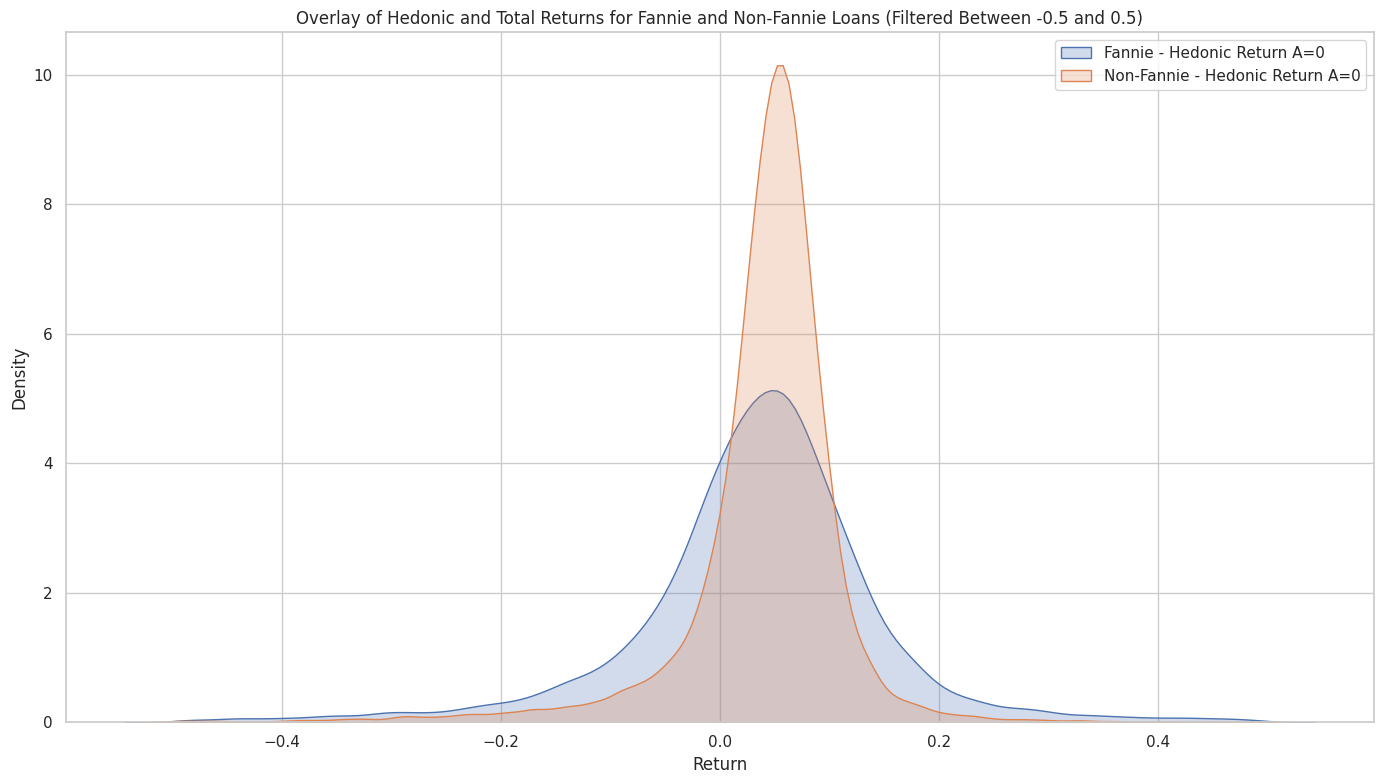

In [59]:
# Define the lower bound (lb) and upper bound (ub)
lb = -0.5
ub = 0.5

# Filtering the data for Hedonic and Total returns within the bounds for cred_fannie_ret
hedonic_ret_A0_fannie = cred_fannie_ret[cred_fannie_ret['Hedonic Ret A=0'].between(lb, ub)]
#hedonic_ret_A1_fannie = cred_fannie_ret[cred_fannie_ret['Hedonic Ret A=1'].between(lb, ub)]
total_ret_A0_fannie = cred_fannie_ret[cred_fannie_ret['Total Ret A=0'].between(lb, ub)]
#total_ret_A1_fannie = cred_fannie_ret[cred_fannie_ret['Total Ret A=1'].between(lb, ub)]

# Filtering the data for Hedonic and Total returns within the bounds for non_fannie
hedonic_ret_A0_non_fannie = non_fannie[non_fannie['hedonic_ret_A=0'].between(lb, ub)]
#hedonic_ret_A1_non_fannie = non_fannie[non_fannie['hedonic_ret_A=1'].between(lb, ub)]
total_ret_A0_non_fannie = non_fannie[non_fannie['total_ret_A=0'].between(lb, ub)]
#total_ret_A1_non_fannie = non_fannie[non_fannie['total_ret_A=1'].between(lb, ub)]

# Start plotting
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot the filtered distributions for Hedonic returns (Fannie)
sns.kdeplot(hedonic_ret_A0_fannie['Hedonic Ret A=0'], label='Fannie - Hedonic Return A=0', shade=True)
#sns.kdeplot(hedonic_ret_A1_fannie['Hedonic Ret A=1'], label='Fannie - Hedonic Return A=1', shade=True)

# Plot the filtered distributions for Hedonic returns (Non-Fannie)
sns.kdeplot(hedonic_ret_A0_non_fannie['hedonic_ret_A=0'], label='Non-Fannie - Hedonic Return A=0', shade=True)
#sns.kdeplot(hedonic_ret_A1_non_fannie['hedonic_ret_A=1'], label='Non-Fannie - Hedonic Return A=1', shade=True)

# Plot the filtered distributions for Total returns (Fannie)
#sns.kdeplot(total_ret_A0_fannie['Total Ret A=0'], label='Fannie - Total Return A=0', shade=True)
#sns.kdeplot(total_ret_A1_fannie['Total Ret A=1'], label='Fannie - Total Return A=1', shade=True)

# Plot the filtered distributions for Total returns (Non-Fannie)
#sns.kdeplot(total_ret_A0_non_fannie['total_ret_A=0'], label='Non-Fannie - Total Return A=0', shade=True)
#sns.kdeplot(total_ret_A1_non_fannie['total_ret_A=1'], label='Non-Fannie - Total Return A=1', shade=True)

# Labeling the plot
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Overlay of Hedonic and Total Returns for Fannie and Non-Fannie Loans (Filtered Between -0.5 and 0.5)')
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
cred_fannie_ret['deal_type'] = 'fannie'
# Define new dataframes to avoid modifying the originals, including A=0.5 columns
fannie_df = cred_fannie_ret[['Hedonic Ret A=0', 'Total Ret A=0', 
                             'Hedonic Ret A=0.5', 'Total Ret A=0.5', 
                             'Hedonic Ret A=1', 'Total Ret A=1', 
                             'Real Underwritten Annual NCF Per Unit','Underwritten Cap Rate','Year+0', 'Property State','deal_type']].copy()
non_fannie_df = non_fannie[['hedonic_ret_A=0', 'total_ret_A=0', 
                            'hedonic_ret_A=0.5', 'total_ret_A=0.5', 
                            'hedonic_ret_A=1', 'total_ret_A=1', 
                            'real_uw_noi_per_size', 'cap_rate','origination_year', 'state','deal_type']].copy()

# Rename columns in non_fannie_df to match fannie_df's column names
non_fannie_df.columns = ['Hedonic Ret A=0', 'Total Ret A=0', 
                         'Hedonic Ret A=0.5', 'Total Ret A=0.5', 
                         'Hedonic Ret A=1', 'Total Ret A=1', 
                         'Real Underwritten Annual NCF Per Unit','Underwritten Cap Rate','Year+0', 'Property State','deal_type']


# Concatenate the two dataframes into a combined dataframe
fannie_non_fannie_ret = pd.concat([fannie_df, non_fannie_df], ignore_index=True)



In [61]:
fannie_non_fannie_ret.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# NOTE: Inforce Table 4: Summary Statistics for Capital Gain and Total Returns (Hedonic Return is Capital Gain)

,Hedonic Ret A=0,Total Ret A=0,Hedonic Ret A=0.5,Total Ret A=0.5,Hedonic Ret A=1,Total Ret A=1,Real Underwritten Annual NCF Per Unit,Underwritten Cap Rate,Year+0
count,81239.0000,81239.0000,81239.0000,81239.0000,81239.0000,81239.0000,93623.0000,93623.0000,93623.0000
mean,0.0366,0.0914,0.0376,0.0924,0.0386,0.0934,9070.2347,0.0565,2015.2102
std,0.1105,0.1178,0.0880,0.0934,0.0847,0.0863,6168.4123,0.0161,5.6000
min,-1.4108,-1.4001,-0.9465,-0.9231,-0.6783,-0.6429,194.0852,0.0100,2000.0000
5%,-0.1282,-0.0879,-0.0957,-0.0527,-0.0753,-0.0269,2972.0978,0.0331,2004.0000
25%,0.0088,0.0580,0.0163,0.0661,0.0190,0.0711,4999.0956,0.0468,2012.0000
50%,0.0477,0.1035,0.0465,0.1021,0.0455,0.1017,7421.5073,0.0556,2017.0000
75%,0.0794,0.1410,0.0698,0.1309,0.0632,0.1230,11128.6682,0.0645,2019.0000
95%,0.1548,0.2214,0.1327,0.1954,0.1361,0.1893,20949.2475,0.0832,2022.0000
max,2.9469,3.9655,1.5033,2.5219,1.1250,1.1639,47994.4411,1.0186,2023.0000


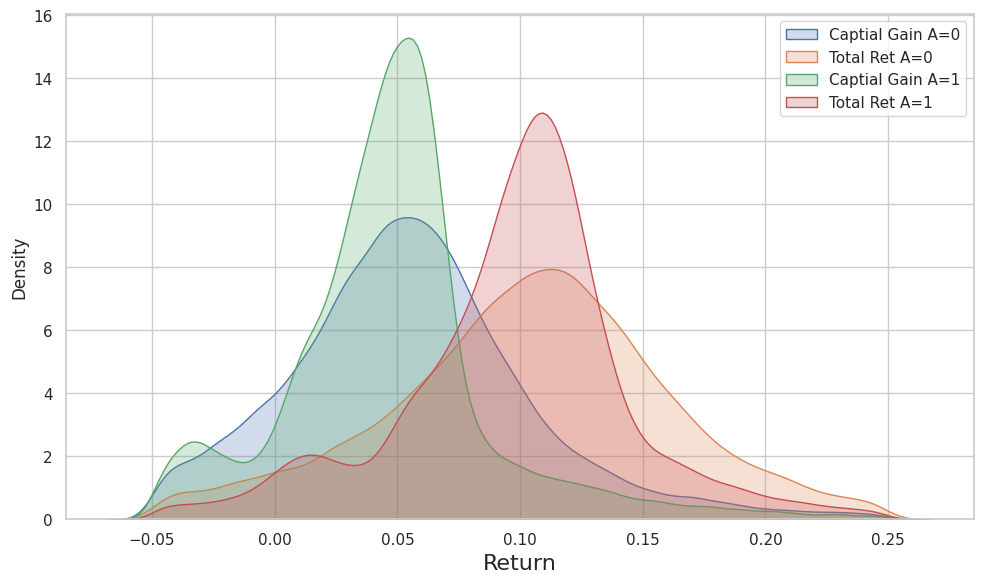

In [62]:
# Set the upper and lower bounds
lb = -0.05
ub = 0.25

# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the distribution for each column in an overlayed manner
sns.kdeplot(fannie_non_fannie_ret[fannie_non_fannie_ret['Hedonic Ret A=0'].between(lb, ub)]['Hedonic Ret A=0'], label='Captial Gain A=0', fill=True)
sns.kdeplot(fannie_non_fannie_ret[fannie_non_fannie_ret['Total Ret A=0'].between(lb, ub)]['Total Ret A=0'], label='Total Ret A=0', fill=True)
sns.kdeplot(fannie_non_fannie_ret[fannie_non_fannie_ret['Hedonic Ret A=1'].between(lb, ub)]['Hedonic Ret A=1'], label='Captial Gain A=1', fill=True)
sns.kdeplot(fannie_non_fannie_ret[fannie_non_fannie_ret['Total Ret A=1'].between(lb, ub)]['Total Ret A=1'], label='Total Ret A=1', fill=True)

# Adding titles and labels
#plt.title("The Distributions of Hedonic and Total Returns", fontsize=16)
plt.xlabel("Return", fontsize=16)
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# NOTE: Inforce Figure 8: Hedonic Capital Gain Return     Dist_hedo_ret_full_sample.png

                  NOI_Bin   mean_noi  Hedonic Ret A=0
0     (194.084, 3600.662]  2853.8180           0.0441
1    (3600.662, 4554.908]  4087.6597           0.0505
2    (4554.908, 5438.429]  4996.7308           0.0472
3    (5438.429, 6369.982]  5895.3908           0.0428
4    (6369.982, 7421.507]  6886.5124           0.0388
5    (7421.507, 8635.888]  8010.9636           0.0329
6   (8635.888, 10174.671]  9361.6330           0.0300
7  (10174.671, 12302.865] 11168.5214           0.0287
8  (12302.865, 16391.852] 14047.5100           0.0263
9  (16391.852, 47994.441] 23393.3354           0.0262
                  NOI_Bin   mean_noi  Hedonic Ret A=0.5
0     (194.084, 3600.662]  2853.8180             0.0552
1    (3600.662, 4554.908]  4087.6597             0.0523
2    (4554.908, 5438.429]  4996.7308             0.0477
3    (5438.429, 6369.982]  5895.3908             0.0425
4    (6369.982, 7421.507]  6886.5124             0.0394
5    (7421.507, 8635.888]  8010.9636             0.0341
6   (8635.888,

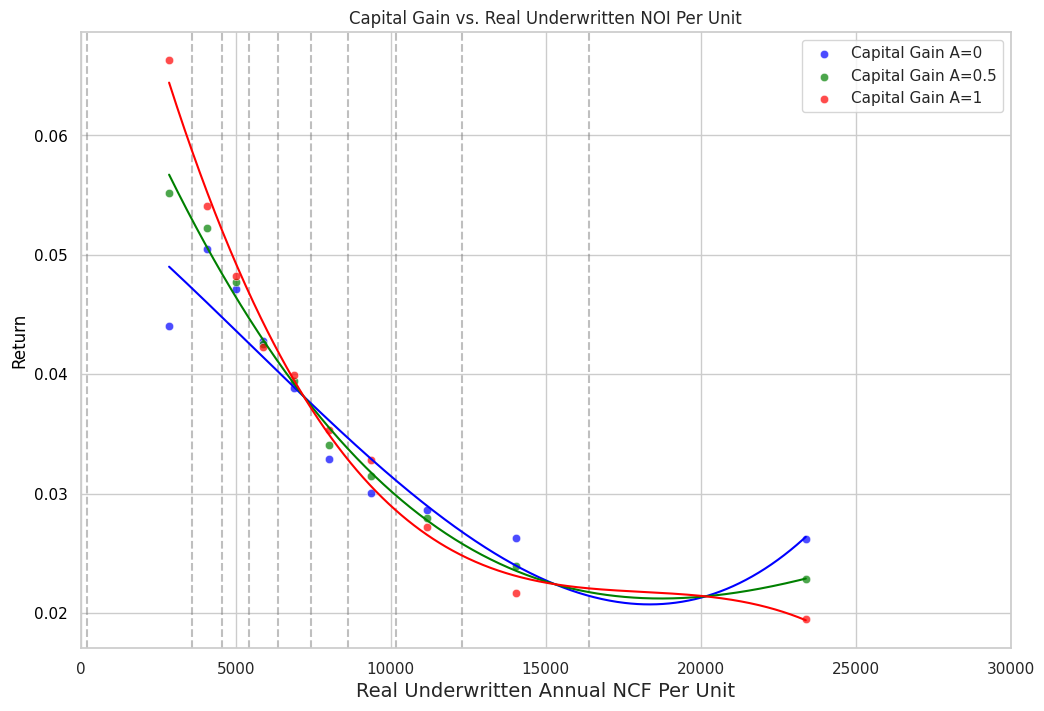

In [63]:
# Function to plot binned scatter plots for multiple return columns in the same graph
def plot_binned_scatter_combined_adjusted(data, return_columns, num_bins=10, title='Return'):
    # Apply binning once based on Real Underwritten Annual NCF Per Unit
    data['NOI_Bin'], bin_edges = pd.qcut(data['Real Underwritten Annual NCF Per Unit'], q=num_bins, retbins=True, duplicates='drop')

    # Initialize a figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot vertical lines indicating bins
    for edge in bin_edges:
        ax.axvline(edge, color='grey', linestyle='--', alpha=0.5)

    # Define colors for the return columns
    colors = ['blue', 'green', 'red', 'orange']  # Adjust the color list based on the number of columns

    # Loop through each return column to create binned scatter plots
    for i, ret_col in enumerate(return_columns):
        
        data_filtered_column = data
        # Calculate the mean NOI and dependent variable for each bin for this return column
        binned_data = data_filtered_column.groupby('NOI_Bin').agg({
            'Real Underwritten Annual NCF Per Unit': 'mean',
            ret_col: 'mean'
        }).reset_index().rename(columns={'Real Underwritten Annual NCF Per Unit': 'mean_noi'})
        print(binned_data)
        # Plot data points for the current return column
        sns.scatterplot(
            data=binned_data,
            x='mean_noi',
            y=ret_col,
            ax=ax,
            color=colors[i % len(colors)],  # Cycle through the color list
            alpha=0.7,
            label=ret_col.replace("Hedonic Ret", "Capital Gain")
        )

        # Fit a spline through the binned data points for the current return column
        spline = UnivariateSpline(binned_data['mean_noi'], binned_data[ret_col], s=1)
        x_spline = np.linspace(min(binned_data['mean_noi']), max(binned_data['mean_noi']), 500)
        y_spline = spline(x_spline)
        ax.plot(x_spline, y_spline, color=colors[i % len(colors)])
    ax.set_xlim(0, 30000)
    # Add labels and title
    ax.set_xlabel('Real Underwritten Annual NCF Per Unit', fontsize=14)
    ax.set_ylabel('Return', color='black')
    ax.tick_params(axis='y', labelcolor='black')
    plt.title(f'{title} vs. Real Underwritten NOI Per Unit')
    plt.grid(True)
    plt.legend()
    plt.show()

# Updated list with all the return columns in your DataFrame
return_columns = [
    'Hedonic Ret A=0', 
    #'Total Ret A=0',
    'Hedonic Ret A=0.5',
    #'Total Ret A=0.5', 
    'Hedonic Ret A=1', 
    #'Total Ret A=1'
]

# Plot for the selected return columns
plot_binned_scatter_combined_adjusted(fannie_non_fannie_ret, return_columns,title='Capital Gain')

# NOTE: Inforce tot_vs_pred_noi_full_sample.png    Figure 12: Relationship Between Net Rent and Capital Gain Return

In [64]:
fannie_non_fannie_ret.dropna(inplace=True)

In [65]:
fannie_non_fannie_ret['Total Ret A=0'] = fannie_non_fannie_ret['Underwritten Cap Rate'] + fannie_non_fannie_ret['Hedonic Ret A=0']
fannie_non_fannie_ret['Total Ret A=0.5'] = fannie_non_fannie_ret['Underwritten Cap Rate'] + fannie_non_fannie_ret['Hedonic Ret A=0.5']
fannie_non_fannie_ret['Total Ret A=1'] = fannie_non_fannie_ret['Underwritten Cap Rate'] + fannie_non_fannie_ret['Hedonic Ret A=1']

                  NOI_Bin   mean_noi  Total Ret A=0
0     (194.084, 3614.086]  2888.1257         0.1013
1    (3614.086, 4582.288]  4110.1217         0.1094
2    (4582.288, 5482.072]  5034.5004         0.1048
3    (5482.072, 6430.342]  5951.7751         0.0997
4    (6430.342, 7495.106]  6955.4632         0.0942
5    (7495.106, 8710.985]  8085.0768         0.0868
6   (8710.985, 10260.543]  9446.8488         0.0832
7  (10260.543, 12377.715] 11248.3475         0.0808
8  (12377.715, 16400.381] 14090.8552         0.0771
9  (16400.381, 47994.441] 23301.0833         0.0771
                  NOI_Bin   mean_noi  Total Ret A=0.5
0     (194.084, 3614.086]  2888.1257           0.1123
1    (3614.086, 4582.288]  4110.1217           0.1111
2    (4582.288, 5482.072]  5034.5004           0.1053
3    (5482.072, 6430.342]  5951.7751           0.0995
4    (6430.342, 7495.106]  6955.4632           0.0949
5    (7495.106, 8710.985]  8085.0768           0.0880
6   (8710.985, 10260.543]  9446.8488           0.0

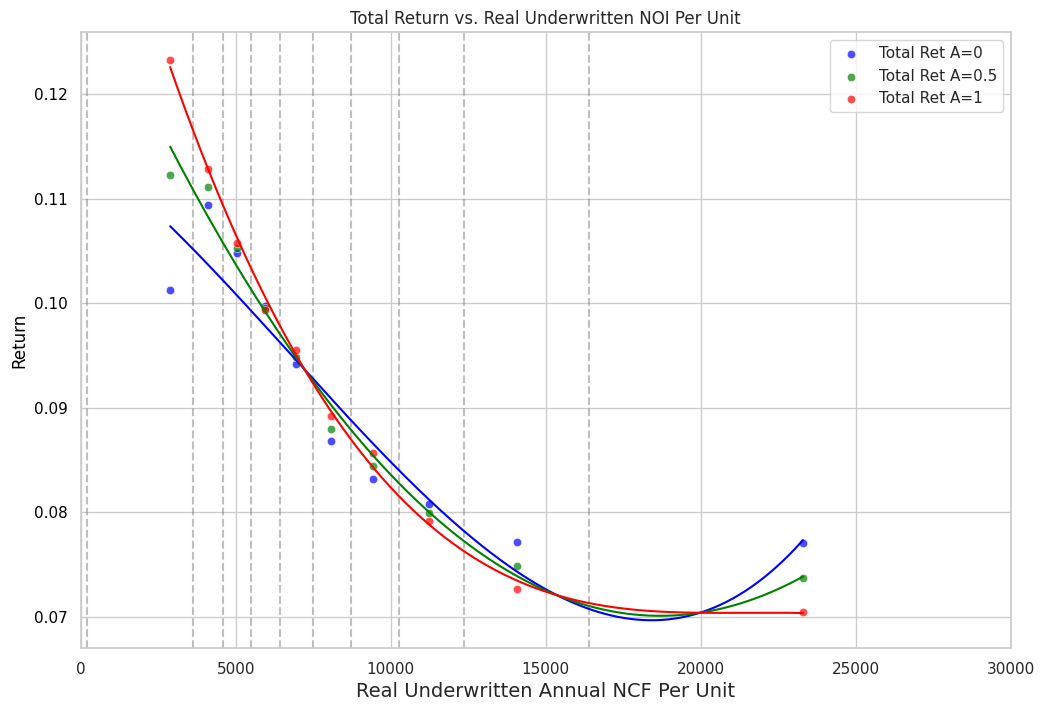

In [66]:
# Updated list with all the return columns in your DataFrame
return_columns = [
    #'Hedonic Ret A=0', 
    'Total Ret A=0',
    #'Hedonic Ret A=0.5',
    'Total Ret A=0.5', 
    #'Hedonic Ret A=1', 
    'Total Ret A=1'
]

# Plot for the selected return columns
plot_binned_scatter_combined_adjusted(fannie_non_fannie_ret, return_columns,title='Total Return')

# NOTE: Inforce Figure 13: Relationship Between Net Rent and Total Return   Inforce hedo_vs_pred_noi_full_sample.png

In [67]:
fannie_non_fannie_ret['if_fannie'] = fannie_non_fannie_ret['deal_type'].apply(lambda x: 'Fannie' if x == 'fannie' else 'Non-Fannie')

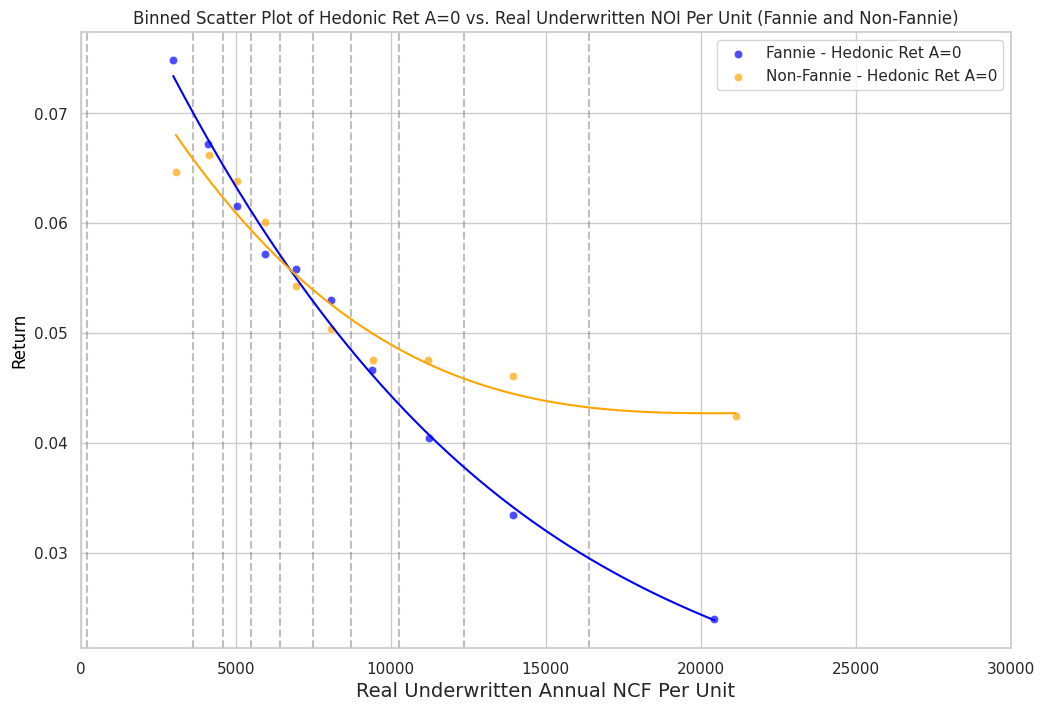

In [68]:
# Function to plot binned scatter plot for Hedonic Ret A=0 for both Fannie and Non-Fannie
def plot_binned_scatter_combined_adjusted(data, ret_column='Hedonic Ret A=0', num_bins=10):
    # Apply binning once based on Real Underwritten Annual NCF Per Unit
    data['NOI_Bin'], bin_edges = pd.qcut(data['Real Underwritten Annual NCF Per Unit'], q=num_bins, retbins=True, duplicates='drop')
    
    # Initialize a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot vertical lines indicating bin edges
    for edge in bin_edges:
        ax.axvline(edge, color='grey', linestyle='--', alpha=0.5)
    
    # Loop through each deal type
    colors = {'Fannie': 'blue', 'Non-Fannie': 'orange'}
    for deal_type, color in colors.items():
        # Filter data for the current deal type and limit ret_column values
        data_filtered = data[(data['if_fannie'] == deal_type) & (data[ret_column] >= -0.05) & (data[ret_column] <= 0.24)]
        
        # Calculate the mean NOI and median return for each bin
        binned_data = data_filtered.groupby('NOI_Bin').agg({
            'Real Underwritten Annual NCF Per Unit': 'median',
            ret_column: 'median'
        }).reset_index().rename(columns={'Real Underwritten Annual NCF Per Unit': 'mean_noi'})
        
        # Plot data points for the current deal type
        sns.scatterplot(
            data=binned_data,
            x='mean_noi',
            y=ret_column,
            ax=ax,
            color=color,
            alpha=0.7,
            label=f'{deal_type} - {ret_column}'
        )

        # Fit a spline through the binned data points for the current deal type
        if len(binned_data) > 1:  # Ensure there are enough points to fit a spline
            spline = UnivariateSpline(binned_data['mean_noi'], binned_data[ret_column], s=1)
            x_spline = np.linspace(min(binned_data['mean_noi']), max(binned_data['mean_noi']), 500)
            y_spline = spline(x_spline)
            ax.plot(x_spline, y_spline, color=color)
    ax.set_xlim(0, 30000)
    # Add labels and title
    ax.set_xlabel('Real Underwritten Annual NCF Per Unit', fontsize=14)
    ax.set_ylabel('Return', color='black')
    plt.title(f'Binned Scatter Plot of {ret_column} vs. Real Underwritten NOI Per Unit (Fannie and Non-Fannie)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot for the 'Hedonic Ret A=0' return column
plot_binned_scatter_combined_adjusted(fannie_non_fannie_ret)

# NOTE: Inforce Figure 22: Capital Gain Return - Fannie Mae vs. Non-Fannie Mae   Hedo_ret_fann_non_fann.png


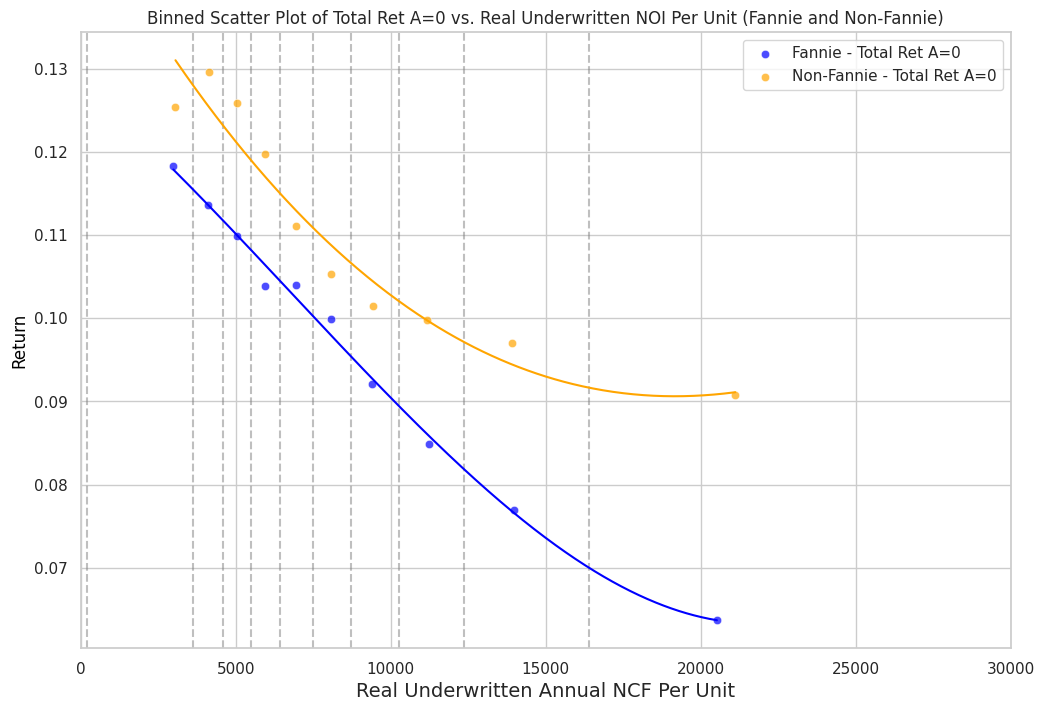

In [69]:
# Plot for the 'Hedonic Ret A=0' return column
plot_binned_scatter_combined_adjusted(fannie_non_fannie_ret,ret_column='Total Ret A=0')

# NOTE: Inforce Figure 23: Total Return - Fannie Mae vs. Non-Fannie Mae  Tot_ret_fann_non_fann.png

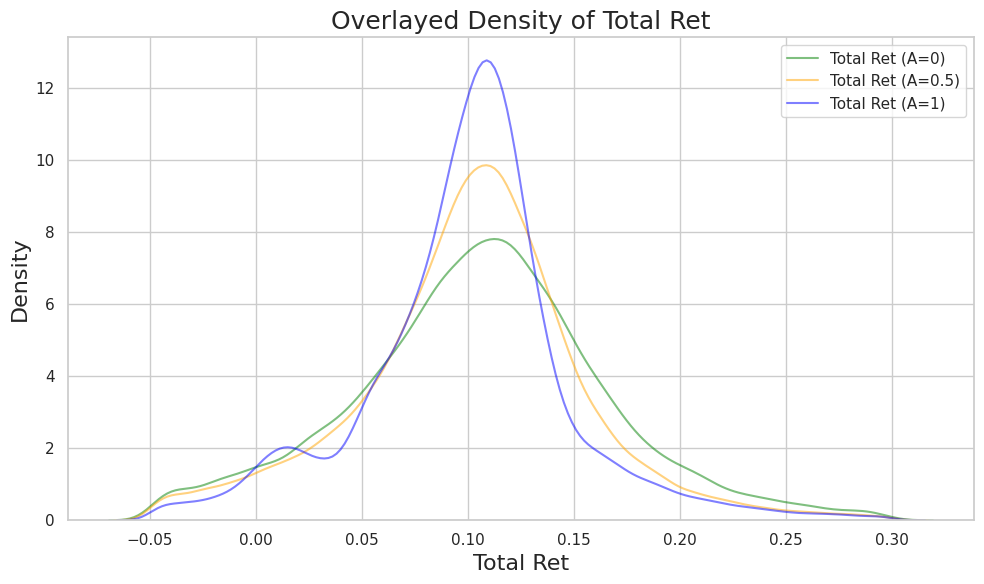

In [70]:
# Filter the data for 'Total Ret A=0', 'Total Ret A=0.5', and 'Total Ret A=1' to only include values between -0.05 and 0.3
total_ret_A0_filtered = fannie_non_fannie_ret[(fannie_non_fannie_ret['Total Ret A=0'] <= 0.3) & 
                                              (fannie_non_fannie_ret['Total Ret A=0'] >= -0.05)]['Total Ret A=0'].dropna()

total_ret_A05_filtered = fannie_non_fannie_ret[(fannie_non_fannie_ret['Total Ret A=0.5'] <= 0.3) & 
                                               (fannie_non_fannie_ret['Total Ret A=0.5'] >= -0.05)]['Total Ret A=0.5'].dropna()

total_ret_A1_filtered = fannie_non_fannie_ret[(fannie_non_fannie_ret['Total Ret A=1'] <= 0.3) & 
                                              (fannie_non_fannie_ret['Total Ret A=1'] >= -0.05)]['Total Ret A=1'].dropna()

# Create the combined figure with three density plots
plt.figure(figsize=(10, 6))

# Plot KDE for Total Ret A=0
sns.kdeplot(total_ret_A0_filtered, color='green', fill=False, alpha=0.5, label='Total Ret (A=0)')
# Plot KDE for Total Ret A=0.5
sns.kdeplot(total_ret_A05_filtered, color='orange', fill=False, alpha=0.5, label='Total Ret (A=0.5)')
# Plot KDE for Total Ret A=1
sns.kdeplot(total_ret_A1_filtered, color='blue', fill=False, alpha=0.5, label='Total Ret (A=1)')

# Labeling
plt.xlabel('Total Ret', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Overlayed Density of Total Ret', fontsize=18)
plt.legend(loc='upper right')
plt.grid(True)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

# NOTE: Inforce Figure 11: Distribution of Total Return    Dist_tot_ret_full_sample.png

In [71]:
fannie_non_fannie_ret.to_pickle('fannie_non_fannie_ret.pkl')

Decile Summary:
Bin Range                 Mean Cap Rate   Bin Count 
194.09 to 3614.09  0.0570          8124      
3614.09 to 4582.29  0.0588          8124      
4582.29 to 5482.07  0.0581          8124      
5482.07 to 6430.34  0.0572          8124      
6430.34 to 7495.11  0.0558          8124      
7495.11 to 8710.99  0.0542          8123      
8710.99 to 10260.54  0.0531          8124      
10260.54 to 12377.71  0.0521          8124      
12377.71 to 16400.38  0.0510          8124      
16400.38 to 47994.44  0.0509          8124      


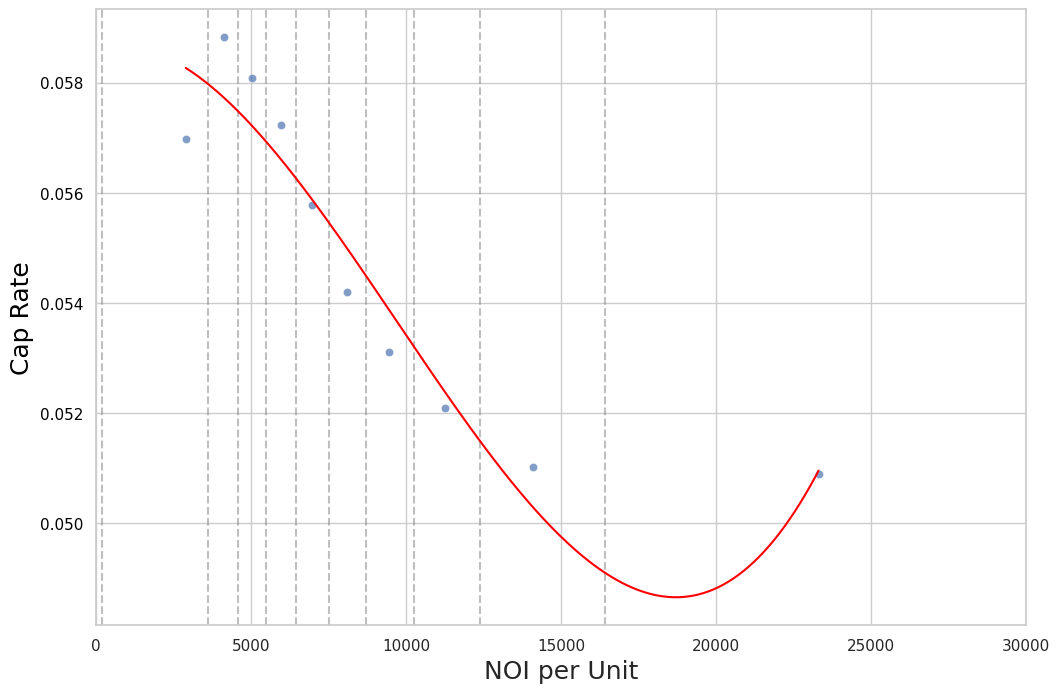

In [72]:
# Filter the data based on the given conditions
filtered_crediq = fannie_non_fannie_ret.copy()
# Define the number of bins
num_bins = 10

def plot_binned_scatter(data, num_bins=10):
    # Create bins for real_uw_noi_per_size using qcut for equal-sized bins
    data['NOI_Bin'], bin_edges = pd.qcut(data['Real Underwritten Annual NCF Per Unit'], q=num_bins, retbins=True, duplicates='drop')
    
    # Calculate the mean Cap Rate, count, and other stats for each bin
    binned_data = data.groupby('NOI_Bin').agg({
        'Real Underwritten Annual NCF Per Unit': 'mean',
        'Underwritten Cap Rate': 'mean',  # Mean Cap Rate
        'deal_type': 'count'  # Count of data points
    }).reset_index().rename(columns={'Real Underwritten Annual NCF Per Unit': 'mean_noi', 'Underwritten Cap Rate': 'mean_cap_rate', 'deal_type': 'bin_count'})
    
    # Print bin edges and average cap rate for each decile
    print("Decile Summary:")
    print(f"{'Bin Range':<25} {'Mean Cap Rate':<15} {'Bin Count':<10}")
    for i, edge in enumerate(bin_edges[:-1]):
        print(f"{edge:.2f} to {bin_edges[i+1]:.2f}  {binned_data['mean_cap_rate'].iloc[i]:<15.4f} {binned_data['bin_count'].iloc[i]:<10}")
    
    # Plot setup
    fig, ax2 = plt.subplots(figsize=(12, 8))

    # Plot vertical lines indicating bins
    for edge in bin_edges:
        plt.axvline(edge, color='grey', linestyle='--', alpha=0.5)
        
    # Plot data points on the secondary y-axis
    sns.scatterplot(
        data=binned_data,
        x='mean_noi',
        y='mean_cap_rate',
        ax=ax2,
        alpha=0.7
    )

    # Fit a spline through the binned data points
    if not binned_data.empty:
        spline = UnivariateSpline(binned_data['mean_noi'], binned_data['mean_cap_rate'], s=1)
        x_spline = np.linspace(min(binned_data['mean_noi']), max(binned_data['mean_noi']), 500)
        y_spline = spline(x_spline)
        ax2.plot(x_spline, y_spline, label='Spline Smoothing', color='red')

    # Set x-axis limit to 30,000
    ax2.set_xlim(0, 30000)
    
    # Add labels and title
    ax2.set_xlabel('NOI per Unit', fontsize=18)
    ax2.set_ylabel('Cap Rate', color='black', fontsize=18)
    ax2.tick_params(axis='y', labelcolor='black')
    plt.grid(True)
    plt.show()

# Plot the binned scatter plot for all deal types together
plot_binned_scatter(filtered_crediq)

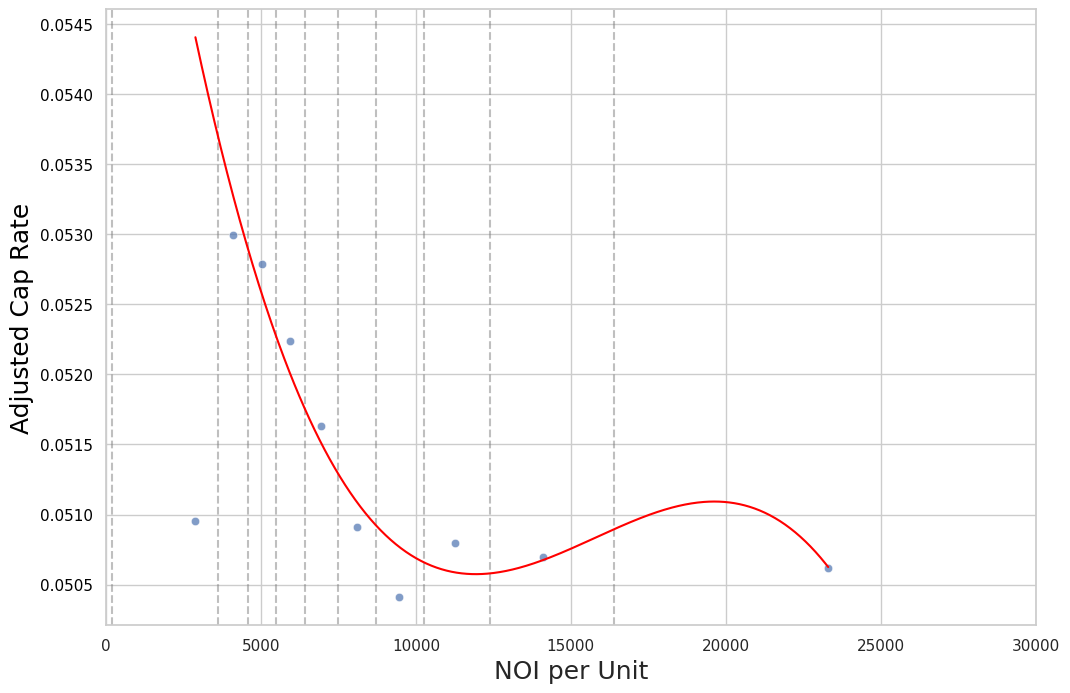

In [73]:
filtered_crediq = fannie_non_fannie_ret.copy()
filtered_crediq = filtered_crediq[['Underwritten Cap Rate', 'Real Underwritten Annual NCF Per Unit', 'Property State', 'Year+0', 'deal_type']]

prepared_X = pd.get_dummies(filtered_crediq, columns=['Property State', 'Year+0', 'deal_type'], drop_first=True)
prepared_X = prepared_X.astype({col: int for col in prepared_X.columns if prepared_X[col].dtype == bool})
independent_vars = [col for col in prepared_X.columns if col not in ['Underwritten Cap Rate', 'Real Underwritten Annual NCF Per Unit']]
X = prepared_X[independent_vars]
X = sm.add_constant(X)
y = prepared_X['Underwritten Cap Rate']
model = sm.OLS(y, X).fit()

# Extract coefficients
intercept = model.params['const']
fe_year = model.params['Year+0_2019']  # Assume 2019 is the base year
state_coeffs = {col: model.params[col] for col in model.params.index if 'Property State_' in col}

# Calculate the proportion of each state in the subset
state_proportions = prepared_X[[col for col in prepared_X.columns if 'Property State_' in col]].mean()

# Calculate the weighted average state fixed effect
weighted_avg_state_fe = sum(state_coeffs[col] * state_proportions[col] for col in state_proportions.index)

deal_coeffs = {col: model.params[col] for col in model.params.index if 'deal_type_' in col}
deal_proportions = prepared_X[[col for col in prepared_X.columns if 'deal_type_' in col]].mean()
weighted_avg_deal_fe = sum(deal_coeffs[col] * deal_proportions[col] for col in deal_proportions.index)

# Compute the adjusted cap rate
prepared_X['adjusted_cap_rate'] = intercept + fe_year + weighted_avg_state_fe + weighted_avg_deal_fe + model.resid
filtered_crediq['adjusted_cap_rate'] = prepared_X['adjusted_cap_rate']

# Define the number of bins
num_bins = 10

# Function to plot the binned scatter plot without histogram for all deal types together
def plot_binned_scatter(data, num_bins=10):
    # Create bins for Real Underwritten Annual NCF Per Unit using qcut for equal-sized bins
    data['NOI_Bin'], bin_edges = pd.qcut(data['Real Underwritten Annual NCF Per Unit'], q=num_bins, retbins=True, duplicates='drop')
    
    # Calculate the mean Cap Rate and count for each bin
    binned_data = data.groupby('NOI_Bin').agg({
        'Real Underwritten Annual NCF Per Unit': 'mean',
        'adjusted_cap_rate': 'mean',
        'deal_type': 'count'
    }).reset_index().rename(columns={'Real Underwritten Annual NCF Per Unit': 'mean_noi', 'adjusted_cap_rate': 'mean_cap_rate', 'deal_type': 'bin_count'})
    
    fig, ax2 = plt.subplots(figsize=(12, 8))

    # Plot vertical lines indicating bins
    for edge in bin_edges:
        plt.axvline(edge, color='grey', linestyle='--', alpha=0.5)
        
    # Plot data points on the secondary y-axis
    sns.scatterplot(
        data=binned_data,
        x='mean_noi',
        y='mean_cap_rate',
        ax=ax2,
        alpha=0.7
    )

    # Fit a spline through the binned data points
    spline = UnivariateSpline(binned_data['mean_noi'][1:], binned_data['mean_cap_rate'][1:], s=1)
    x_spline = np.linspace(min(binned_data['mean_noi']), max(binned_data['mean_noi']), 500)
    y_spline = spline(x_spline)
    ax2.plot(x_spline, y_spline, label='Spline Smoothing', color='red')

    # Set x-axis limit to 30,000
    ax2.set_xlim(0, 30000)
    
    # Add labels and title
    ax2.set_xlabel('NOI per Unit', fontsize=18)
    ax2.set_ylabel('Adjusted Cap Rate', color='black', fontsize=18)
    ax2.tick_params(axis='y', labelcolor='black')
    plt.grid(True)
    plt.show()

# Plot the binned scatter plot for all deal types together
plot_binned_scatter(filtered_crediq)


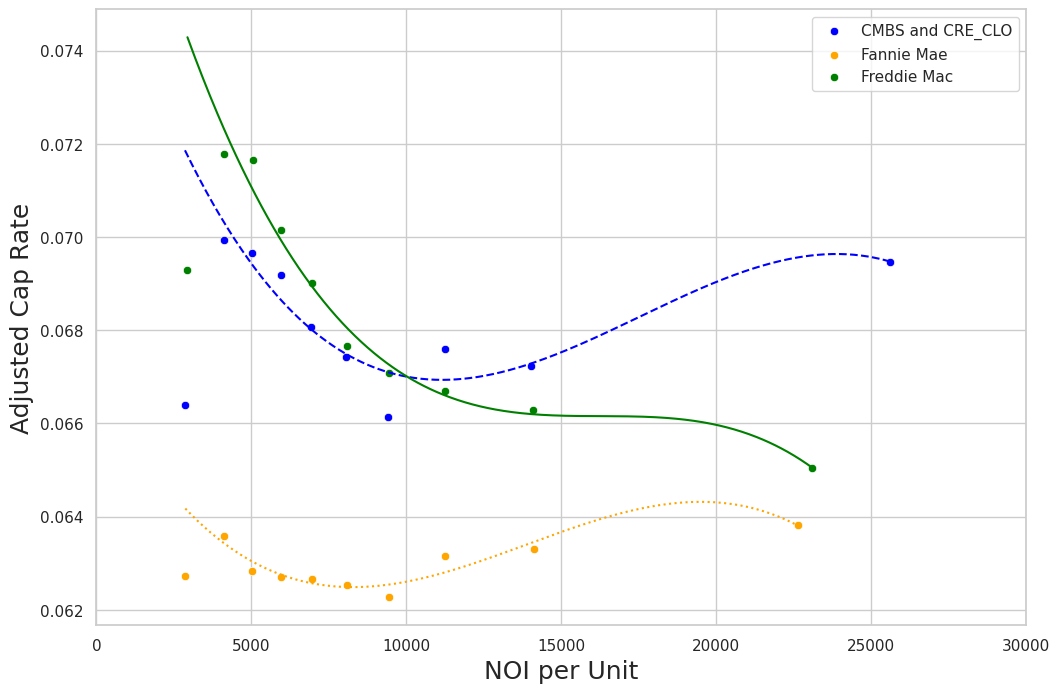

In [74]:
filtered_crediq = fannie_non_fannie_ret.copy()
#filtered_crediq.dropna(subset=['_id'],inplace=True)
filtered_crediq = filtered_crediq[['Underwritten Cap Rate', 'Real Underwritten Annual NCF Per Unit', 'Property State', 'Year+0', 'deal_type']]
# Store deal_type before creating dummies
filtered_crediq['original_deal_type'] = filtered_crediq['deal_type']
filtered_crediq['NOI_Bin'], bin_edges = pd.qcut(filtered_crediq['Real Underwritten Annual NCF Per Unit'], q=10, retbins=True, duplicates='drop')

# Rename the bins to numbers from 1 to 20
bin_labels = list(range(1, len(filtered_crediq['NOI_Bin'].cat.categories) + 1))
filtered_crediq['NOI_Bin'] = filtered_crediq['NOI_Bin'].cat.rename_categories(bin_labels)
filtered_crediq['original_NOI_Bin'] = filtered_crediq['NOI_Bin']
# Define dummy variables for Property State, Year+0, deal_type, and NOI_Bin
filtered_crediq = pd.get_dummies(filtered_crediq, columns=['Property State', 'Year+0', 'deal_type', 'NOI_Bin'], drop_first=True)

filtered_crediq = filtered_crediq.astype({col: int for col in filtered_crediq.columns if filtered_crediq[col].dtype == bool})
# Generate interaction terms for deal_type and NOI_Bin
for originator in ['freddie_mac', 'fannie', 'cre_clo']:
    for binn in range(2,11):
        filtered_crediq[f'{originator}_NOI_Bin_{binn}'] = filtered_crediq[f'deal_type_{originator}'] * filtered_crediq[f'NOI_Bin_{binn}']

# Define the independent variables (excluding the dependent variable 'Underwritten Cap Rate')
independent_vars = [col for col in filtered_crediq.columns if col not in ['Underwritten Cap Rate', 'Real Underwritten Annual NCF Per Unit','original_deal_type','original_NOI_Bin']]
independent_vars = [col for col in independent_vars if not (col.startswith('deal_type_') or col.startswith('NOI_Bin_'))]

# Run the regression
X = filtered_crediq[independent_vars]
X = sm.add_constant(X)
y = filtered_crediq['Underwritten Cap Rate']
model = sm.OLS(y, X).fit()
# Extract coefficients
intercept = model.params['const']

#noi_bin_coeffs = {col: model.params[col] for col in model.params.index if 'NOI_Bin_' in col}
interaction_coeffs = {col: model.params[col] for col in model.params.index if '_' in col and 'NOI_Bin_' in col}

interaction_terms_matrix = filtered_crediq[list(interaction_coeffs.keys())].dot(pd.Series(interaction_coeffs))


#beta_noi = model.params['Real Underwritten Annual NCF Per Unit']
fe_2019 = model.params['Year+0_2019']
state_coeffs = {col: model.params[col] for col in model.params.index if 'state_' in col}

# Calculate the proportion of each state in the subset
state_proportions = X[[col for col in X.columns if 'state_' in col]].mean()

# Calculate the weighted average state fixed effect
weighted_avg_state_fe = sum(state_coeffs[col] * state_proportions[col] for col in state_proportions.index)


filtered_crediq['adjusted_cap_rate'] = intercept + interaction_terms_matrix + fe_2019 + weighted_avg_state_fe + model.resid


filtered_crediq.loc[filtered_crediq['original_deal_type'] == 'conduit', 'original_deal_type'] = 'CMBS and CRE_CLO'
filtered_crediq.loc[filtered_crediq['original_deal_type'] == 'cre_clo', 'original_deal_type'] = 'CMBS and CRE_CLO'

# Prepare the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Update the colors dictionary with new legend labels
colors = {
    'Fannie Mae': 'orange',
    'CMBS and CRE_CLO': 'blue',
    'Freddie Mac': 'green'
}

# Update the linestyles dictionary with new legend labels
linestyles = {
    'Fannie Mae': 'dotted',
    'CMBS and CRE_CLO': 'dashed',
    'Freddie Mac': 'solid'
}

# Update originator groups with new legend labels
originator_groups = ['CMBS and CRE_CLO', 'Fannie Mae', 'Freddie Mac']

# Replace values in the dataframe to match the new labels
filtered_crediq['original_deal_type'].replace({'fannie': 'Fannie Mae', 'freddie_mac': 'Freddie Mac'}, inplace=True)

# Compute adjusted cap rates for each originator type within the same calculation
for originator in originator_groups:
    subset = filtered_crediq[filtered_crediq['original_deal_type'] == originator]

    # Calculate the mean Cap Rate and count for each bin
    binned_data = subset.groupby('original_NOI_Bin').agg({
        'Real Underwritten Annual NCF Per Unit': 'mean',
        'adjusted_cap_rate': 'mean'
    }).reset_index().rename(columns={'Real Underwritten Annual NCF Per Unit': 'mean_noi', 'adjusted_cap_rate': 'mean_adjusted_cap_rate'})

    # Plot data points on the primary axis
    sns.scatterplot(
        data=binned_data,
        x='mean_noi',
        y='mean_adjusted_cap_rate',
        label=originator,
        color=colors[originator],
        ax=ax
    )

    # Fit a spline through the binned data points
    spline = UnivariateSpline(binned_data['mean_noi'][1:], binned_data['mean_adjusted_cap_rate'][1:], s=1)
    x_spline = np.linspace(min(binned_data['mean_noi']), max(binned_data['mean_noi']), 500)
    y_spline = spline(x_spline)

    # Plot the spline smoothed line with different line styles
    ax.plot(x_spline, y_spline, color=colors[originator], linestyle=linestyles[originator])

# Set x-axis limit to 30,000
    ax.set_xlim(0, 30000)

# Add labels and title
ax.set_xlabel('NOI per Unit', fontsize=18)
ax.set_ylabel('Adjusted Cap Rate', fontsize=18)
#plt.title('Binned Scatter Plot: Adjusted Cap Rate vs. Real UW NOI per Unit for Different Deal Types', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

# NOTE: Inforce Figure 5: Adjusted Relationship Between Net Rent and Net Rental Yield Across Deal Types     CP_contr_method2.png

In [75]:
fannie_non_fannie_ret['NOI_Bin'], bins = pd.qcut(fannie_non_fannie_ret['Real Underwritten Annual NCF Per Unit'], q=10, labels=[f'D{i}' for i in range(1, 11)], retbins=True, duplicates='drop')


# Group by the new 'D' column and calculate the mean for the specified columns
grouped_means = fannie_non_fannie_ret.groupby('NOI_Bin')[['Underwritten Cap Rate', 'Hedonic Ret A=0.5', 'Total Ret A=0.5']].mean()
# Display the result
grouped_means

,Underwritten Cap Rate,Hedonic Ret A=0.5,Total Ret A=0.5
NOI_Bin,,,
D1,0.0570,0.0553,0.1123
D2,0.0588,0.0523,0.1111
D3,0.0581,0.0472,0.1053
D4,0.0572,0.0423,0.0995
D5,0.0558,0.0391,0.0949
D6,0.0542,0.0338,0.0880
D7,0.0531,0.0313,0.0844
D8,0.0521,0.0279,0.0800
D9,0.0510,0.0239,0.0749


In [77]:
fannie_non_fannie_ret.groupby('NOI_Bin')['Real Underwritten Annual NCF Per Unit'].mean()

NOI_Bin
D1     2888.1257
D2     4110.1217
D3     5034.5004
D4     5951.7751
D5     6955.4632
D6     8085.0768
D7     9446.8488
D8    11248.3475
D9    14090.8552
D10   23301.0833
Name: Real Underwritten Annual NCF Per Unit, dtype: float64